# Credit EDA Assignement

## Pawan Kumar
## 19-June-2022

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## making user function for analysis purpose

In [2]:
# Count plot for univariate variables analysis
def plot_one_var(df,col,title,hue=None):
    plt.figure(figsize=(25,10))
    plt.title(title)
    plt.xticks(rotation=90)
    sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue=hue)
    plt.show()
    
# HeatMap for Correlation analysis
def corr_heatmap(data,title):
    plt.figure(figsize=(25, 10))
    sns.heatmap(data,annot=True)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()
    
# Box plotting for univariate variables analysis
def univariate_analysis(data,col,title):
    plt.title(title)
    sns.boxplot(data = data,y=col)
    plt.show()    

## Loading Application data

In [3]:
appdata=pd.read_csv('application_data.csv')

In [4]:
# seeing row and columnss
appdata.shape

(307511, 122)

### see the no of null values of each columns

In [5]:
appdata.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [6]:
# seeing percentage of null values
(appdata.isnull().sum()/len(appdata)*100).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [7]:
#taking thresold at 35% of columns

columns_greater_than_35per = (appdata.isnull().sum()/len(appdata)*100).sort_values(ascending=False)
columns_greater_than_35per = columns_greater_than_35per[columns_greater_than_35per.values>35]
columns_greater_than_35per

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [8]:
columns_greater_than_35per.shape

(49,)

In [9]:
len(columns_greater_than_35per)

49

In [10]:
#taking index of 49 columns whose 35%
columns_index_35per = columns_greater_than_35per.index
columns_index_35per

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

In [11]:
#droping 35% columns
appdata.drop(labels = columns_index_35per,axis=1,inplace=True)

In [12]:
appdata.shape

(307511, 73)

In [13]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [14]:
appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [15]:
(appdata.isnull().sum()/len(appdata)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

In [16]:
appdata['OCCUPATION_TYPE'].fillna('Occupation Not Available',inplace=True)

In [17]:
(appdata.isnull().sum()/len(appdata)*100).sort_values(ascending=False)

EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

In [18]:
appdata.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [19]:
appdata.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [20]:
appdata.EXT_SOURCE_3.fillna(appdata.EXT_SOURCE_3.median(),inplace=True)

In [21]:
(appdata.isnull().sum()/len(appdata)*100).sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

In [22]:
appdata.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [23]:
appdata.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(appdata.AMT_REQ_CREDIT_BUREAU_YEAR.median(),inplace=True)
appdata.AMT_REQ_CREDIT_BUREAU_QRT.fillna(appdata.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)
appdata.AMT_REQ_CREDIT_BUREAU_MON.fillna(appdata.AMT_REQ_CREDIT_BUREAU_MON.median(),inplace=True)
appdata.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(appdata.AMT_REQ_CREDIT_BUREAU_WEEK.median(),inplace=True)
appdata.AMT_REQ_CREDIT_BUREAU_DAY.fillna(appdata.AMT_REQ_CREDIT_BUREAU_DAY.median(),inplace=True)
appdata.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(appdata.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace=True)

In [24]:
(appdata.isnull().sum()/len(appdata)*100).sort_values(ascending=False)

NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
                                 ...   
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
TARGET                         0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

In [25]:
appdata.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [26]:
appdata.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace = True)

In [27]:
(appdata.isnull().sum()/len(appdata)*100).sort_values(ascending=False)

OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
                                 ...   
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

In [28]:
appdata.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [29]:
appdata.OBS_30_CNT_SOCIAL_CIRCLE.fillna(appdata.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
appdata.DEF_30_CNT_SOCIAL_CIRCLE.fillna(appdata.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
appdata.OBS_60_CNT_SOCIAL_CIRCLE.fillna(appdata.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
appdata.DEF_60_CNT_SOCIAL_CIRCLE.fillna(appdata.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [30]:
appdata.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
                              ... 
HOUR_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
LIVE_REGION_NOT_WORK_REGION      0
AMT_REQ_CREDIT_BUREAU_YEAR       0
Length: 73, dtype: int64

In [31]:
appdata.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [32]:
appdata.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [33]:
appdata.EXT_SOURCE_2.fillna(appdata.EXT_SOURCE_2.median(),inplace=True)

In [34]:
appdata.isnull().sum().sort_values(ascending=False)

AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
FLAG_DOCUMENT_2                  0
                              ... 
HOUR_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
LIVE_REGION_NOT_WORK_REGION      0
AMT_REQ_CREDIT_BUREAU_YEAR       0
Length: 73, dtype: int64

In [35]:
appdata.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [36]:
appdata['AMT_GOODS_PRICE'].fillna(appdata['AMT_GOODS_PRICE'].median(),inplace=True)

In [37]:
appdata.isnull().sum().sort_values(ascending=False)

AMT_ANNUITY                   12
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_7                0
                              ..
FLAG_CONT_MOBILE               0
FLAG_WORK_PHONE                0
FLAG_EMP_PHONE                 0
FLAG_MOBIL                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
Length: 73, dtype: int64

In [38]:
appdata.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [39]:
appdata['AMT_ANNUITY'].fillna(appdata['AMT_ANNUITY'].median(),inplace=True)

In [40]:
appdata.isnull().sum().sort_values(ascending=False)

CNT_FAM_MEMBERS               2
DAYS_LAST_PHONE_CHANGE        1
FLAG_DOCUMENT_9               0
FLAG_DOCUMENT_7               0
FLAG_DOCUMENT_6               0
                             ..
FLAG_WORK_PHONE               0
FLAG_EMP_PHONE                0
FLAG_MOBIL                    0
DAYS_ID_PUBLISH               0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [41]:
appdata.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [42]:
appdata['CNT_FAM_MEMBERS'].fillna(appdata['CNT_FAM_MEMBERS'].median(),inplace=True)

In [43]:
appdata.isnull().sum().sort_values(ascending=False)

DAYS_LAST_PHONE_CHANGE        1
REG_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_8               0
FLAG_DOCUMENT_7               0
FLAG_DOCUMENT_6               0
                             ..
FLAG_CONT_MOBILE              0
FLAG_WORK_PHONE               0
FLAG_EMP_PHONE                0
FLAG_MOBIL                    0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [44]:
appdata.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [45]:
appdata.DAYS_LAST_PHONE_CHANGE.fillna(appdata.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [46]:
appdata.isnull().sum().sort_values(ascending=False)

SK_ID_CURR                    0
REG_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_8               0
FLAG_DOCUMENT_7               0
FLAG_DOCUMENT_6               0
                             ..
FLAG_CONT_MOBILE              0
FLAG_WORK_PHONE               0
FLAG_EMP_PHONE                0
FLAG_MOBIL                    0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [47]:
appdata.isnull().sum(axis=1).sort_values(ascending=False)

0         0
205014    0
205012    0
205011    0
205010    0
         ..
102503    0
102502    0
102501    0
102500    0
307510    0
Length: 307511, dtype: int64

In [48]:
for i in appdata.columns:
    if (appdata[appdata[i]=='XNA'].shape)[0] != 0:
        print(i,' = ',appdata[appdata[i]=='XNA'].shape)

CODE_GENDER  =  (4, 73)
ORGANIZATION_TYPE  =  (55374, 73)


In [49]:
appdata['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Female is having the majority and only 4 rows are having NA values, we will update with 'F'

In [50]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

appdata.loc[appdata['CODE_GENDER']=='XNA','CODE_GENDER']='F'
appdata['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [51]:
appdata.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [52]:
# Describing the organization type column

appdata['ORGANIZATION_TYPE'].value_counts()


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

in column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values.
Hence if we drop the rows of total 55374

In [53]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

appdata = appdata.drop(appdata.loc[appdata['ORGANIZATION_TYPE']=='XNA'].index)
appdata[appdata['ORGANIZATION_TYPE']=='XNA'].shape

(0, 73)

In [54]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  AMT_GOODS_PRICE              252137 non-null  float64
 11  NAME_TYPE_SUITE              252137 non-null  object 
 12  NAME_INCOME_TYPE             252137 non-null  object 
 13 

In [55]:
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Derived Metrics**

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [56]:
# Bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

appdata['AMT_INCOME_RANGE']=pd.cut(appdata['AMT_INCOME_TOTAL'],bins,labels=slot)

In [57]:
# Bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

appdata['AMT_CREDIT_RANGE']=pd.cut(appdata['AMT_CREDIT'],bins=bins,labels=slots)

In [58]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_appdata=appdata.loc[appdata["TARGET"]==0]
target1_appdata=appdata.loc[appdata["TARGET"]==1]


**Univariate analysis for categories**

**Now, doing Categorical Univariate Analysis for target=0 (i.e. client with no payment difficulties)**

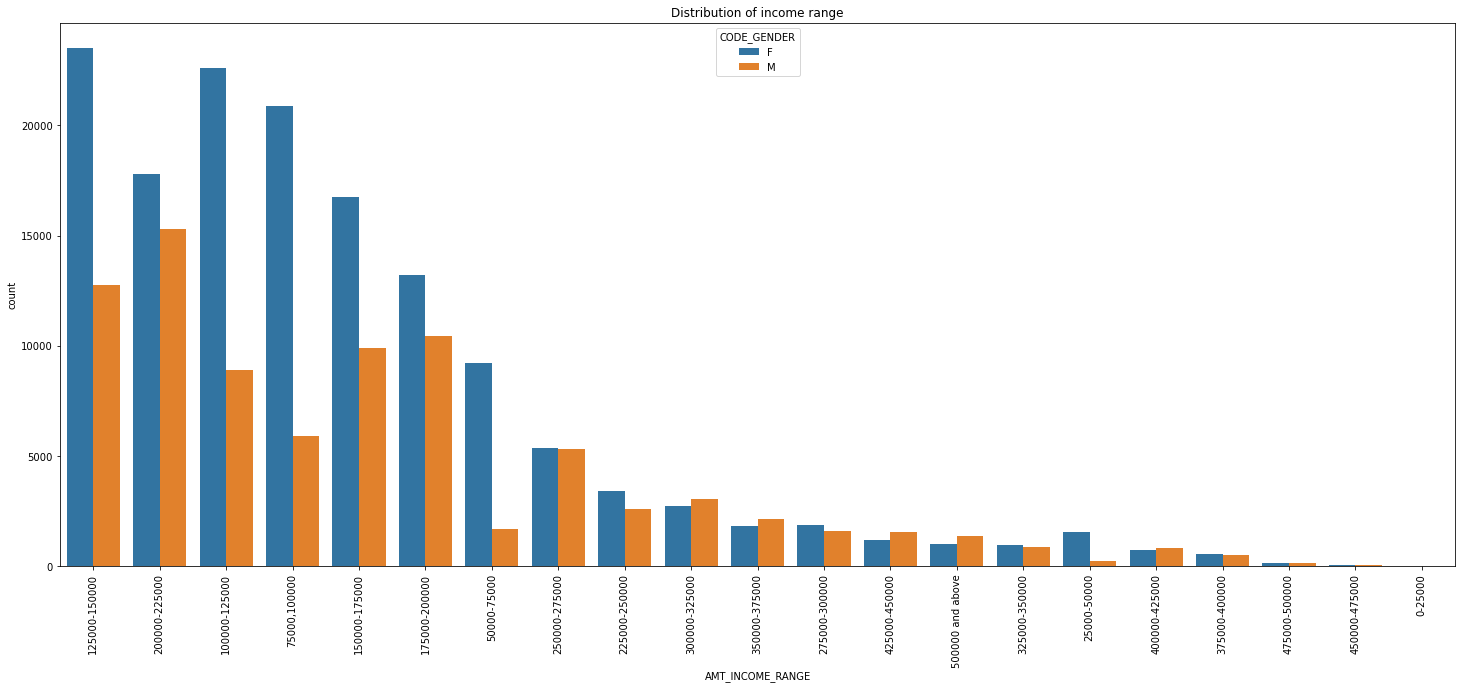

In [59]:
# PLotting for income range

plot_one_var(target0_appdata,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


Points to be concluded from the above graph.

1. Female counts are higher than male.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Very less count for income range 400000 and above.

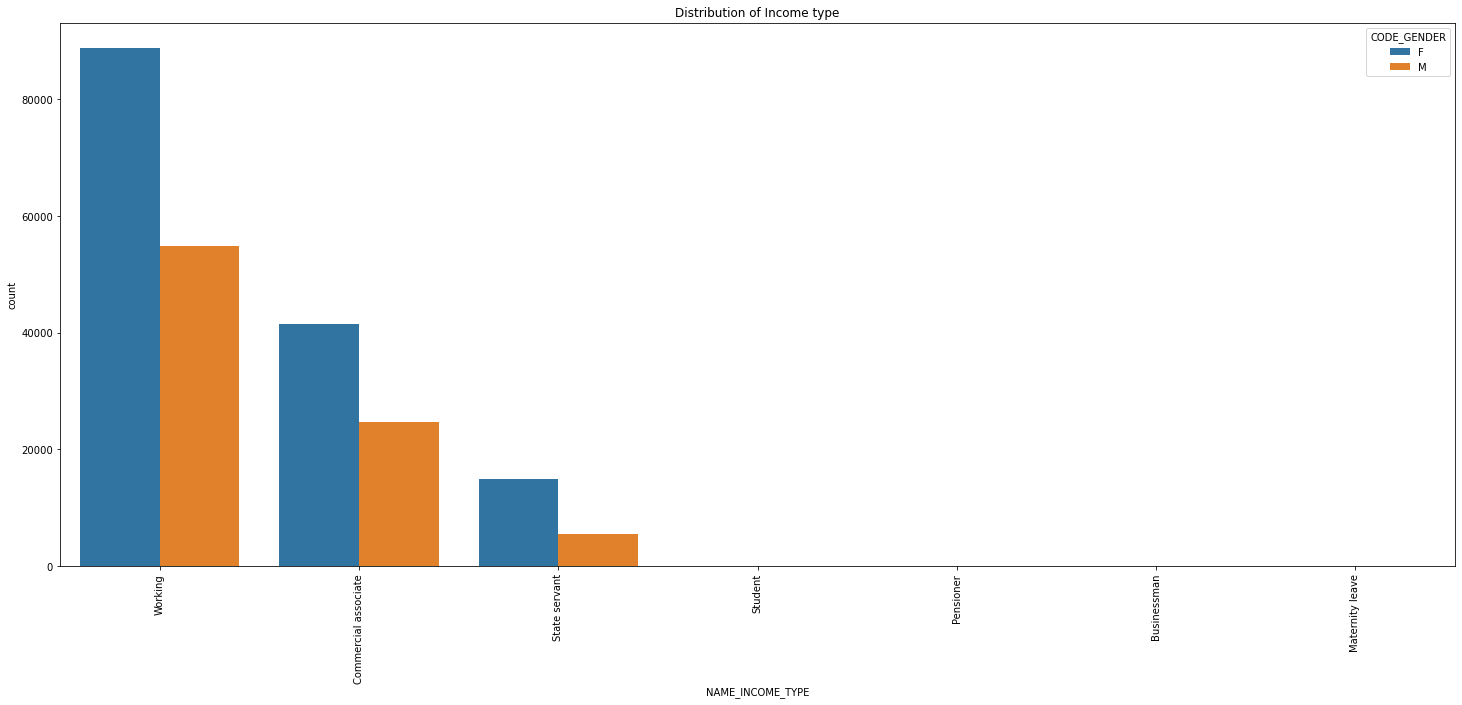

In [60]:
# Plotting for Income type

plot_one_var(target0_appdata,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

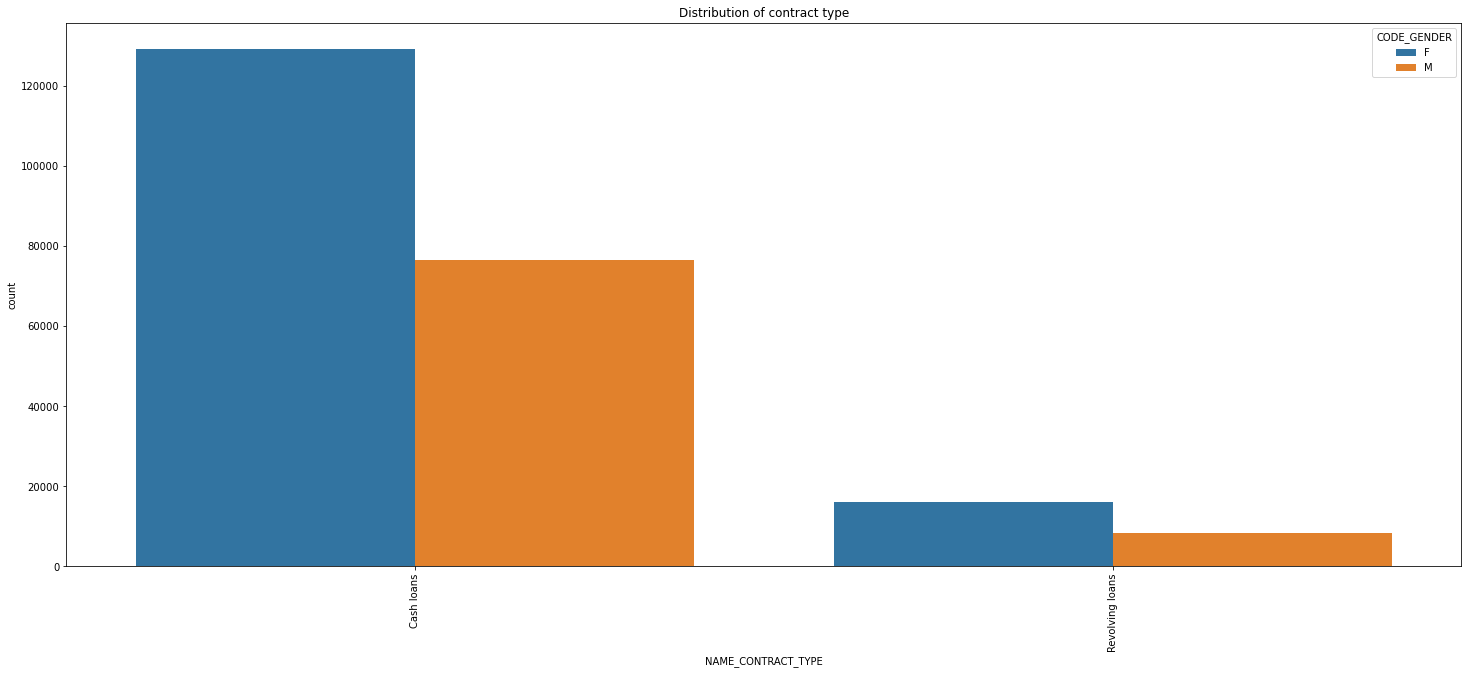

In [61]:
# Plotting for Contract type

plot_one_var(target0_appdata,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

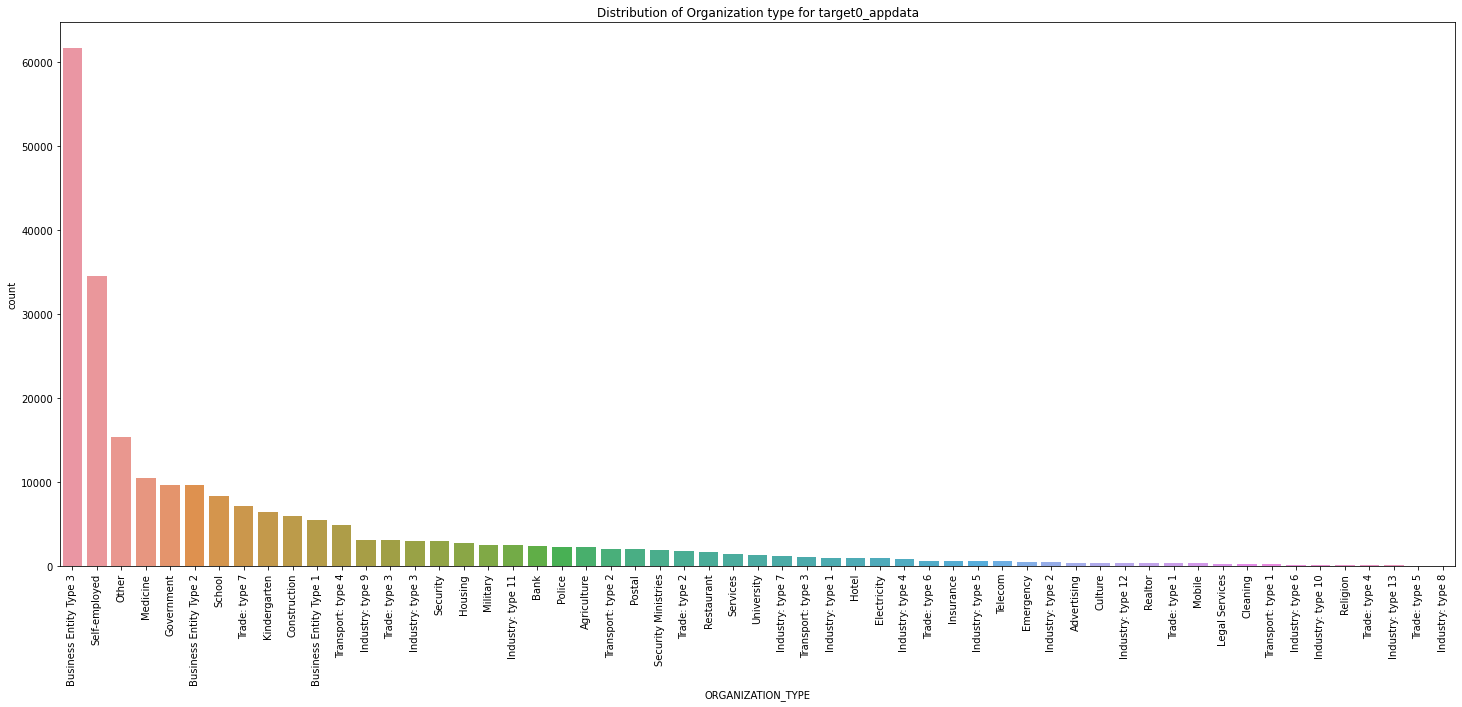

In [62]:
# Plotting for Organization type

plot_one_var(target0_appdata,col='ORGANIZATION_TYPE',title='Distribution of Organization type for target0_appdata')

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.


**Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1 (i.e. client with payment difficulties)**

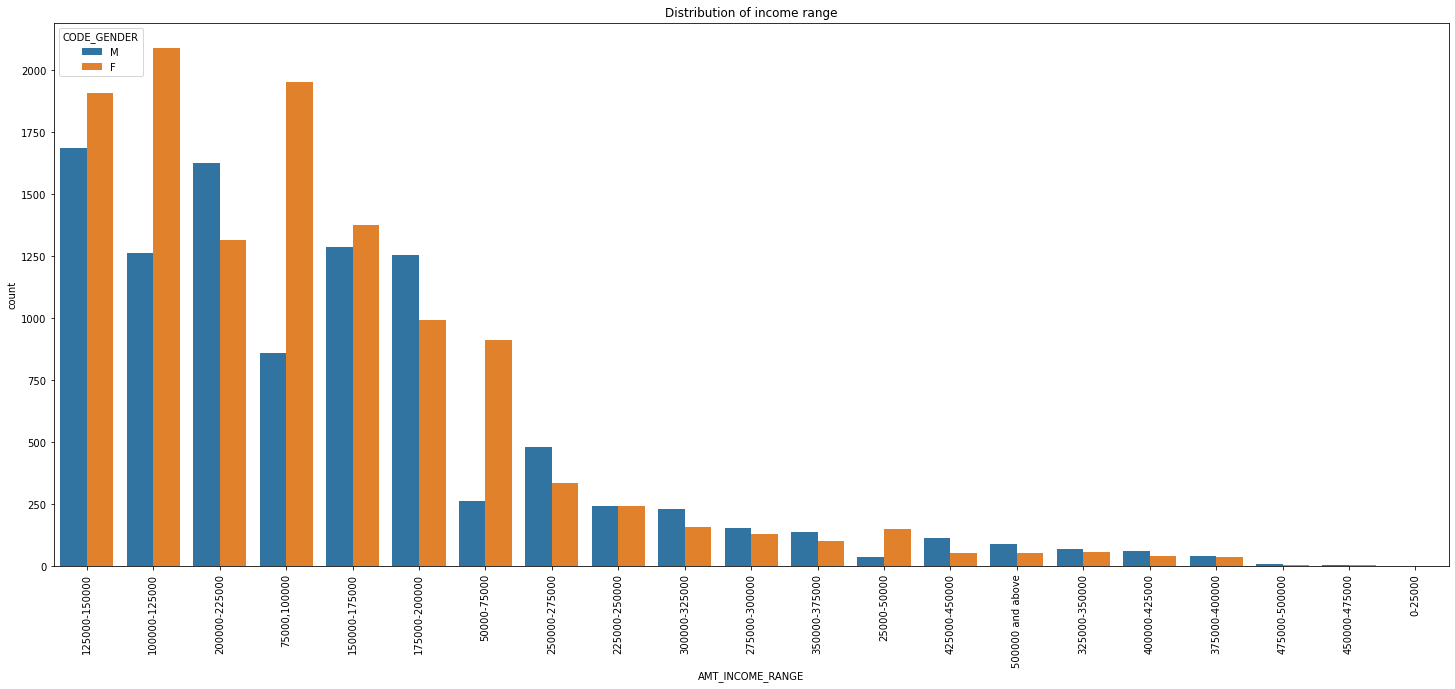

In [63]:
# PLotting for income range

plot_one_var(target1_appdata,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.


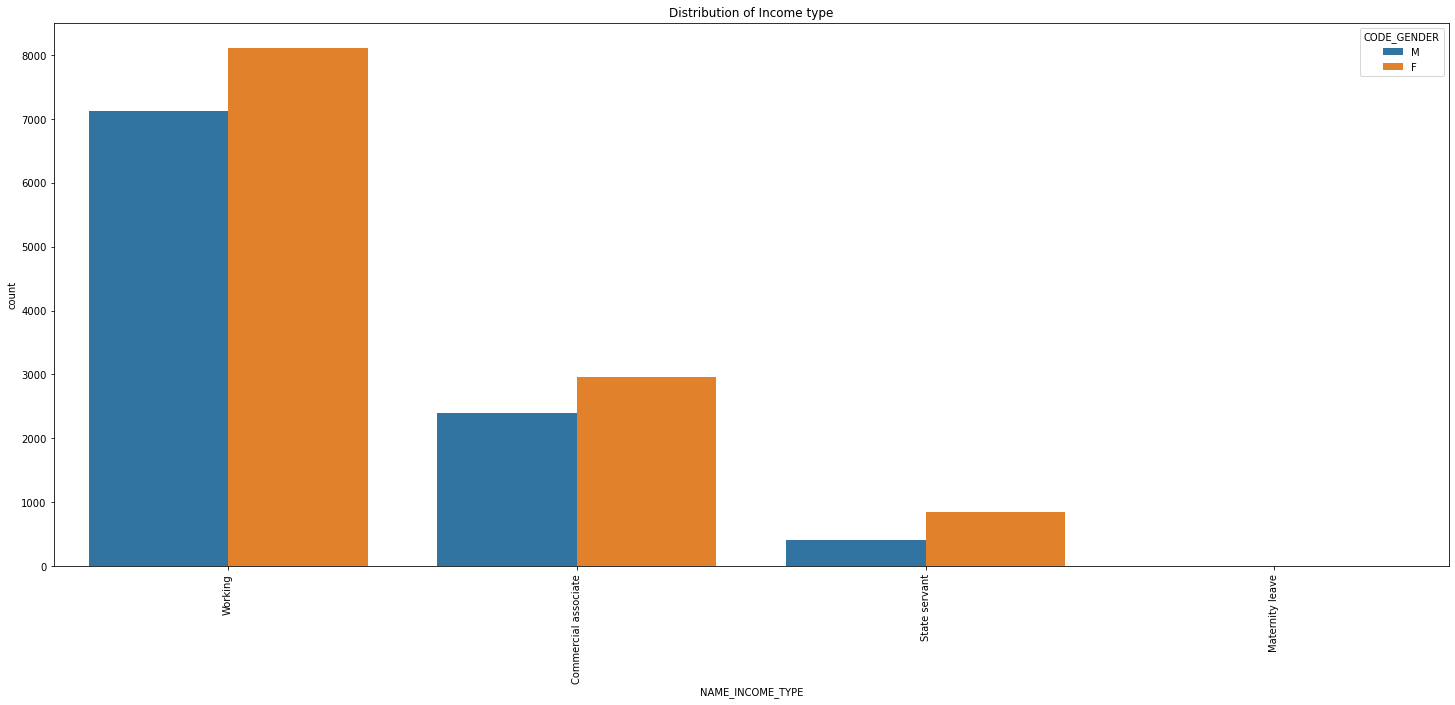

In [64]:
# Plotting for Income type

plot_one_var(target1_appdata,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.   ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type  ‘Maternity leave’.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

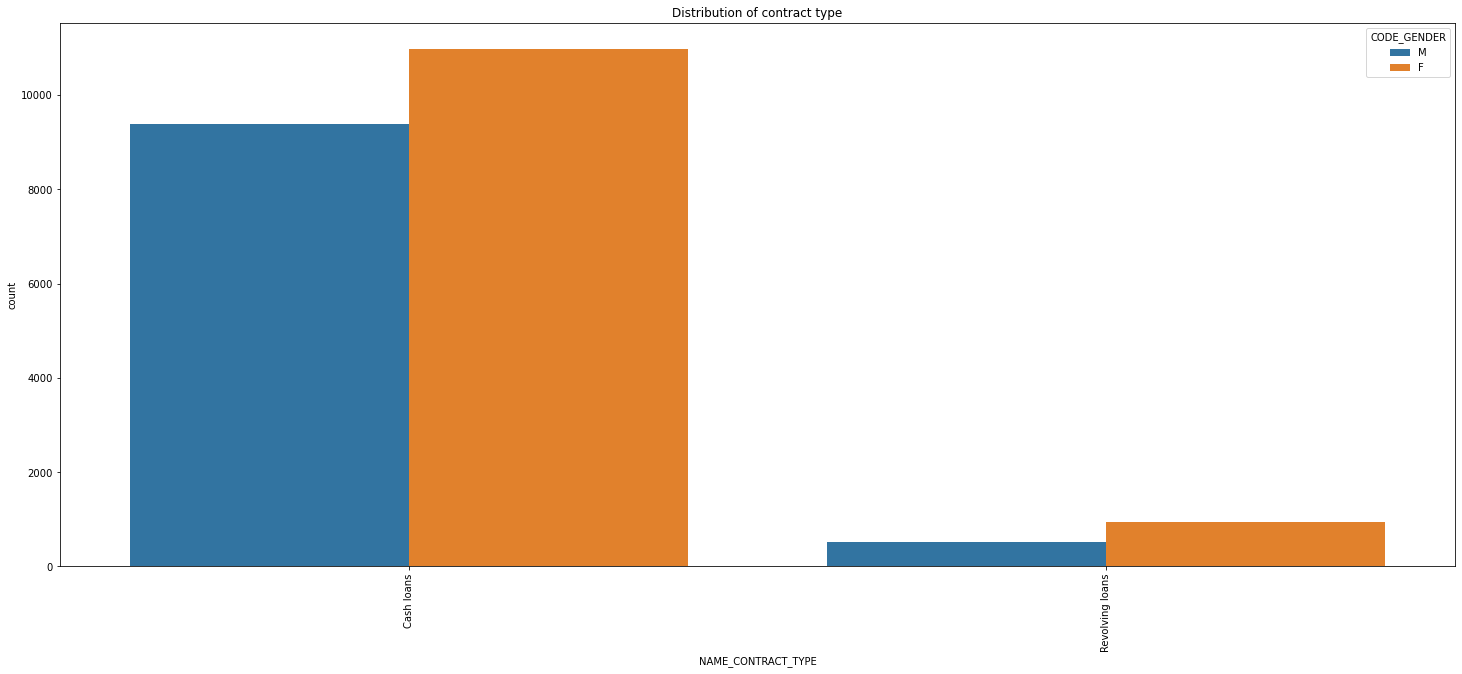

In [65]:
# Plotting for Contract type

plot_one_var(target1_appdata,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

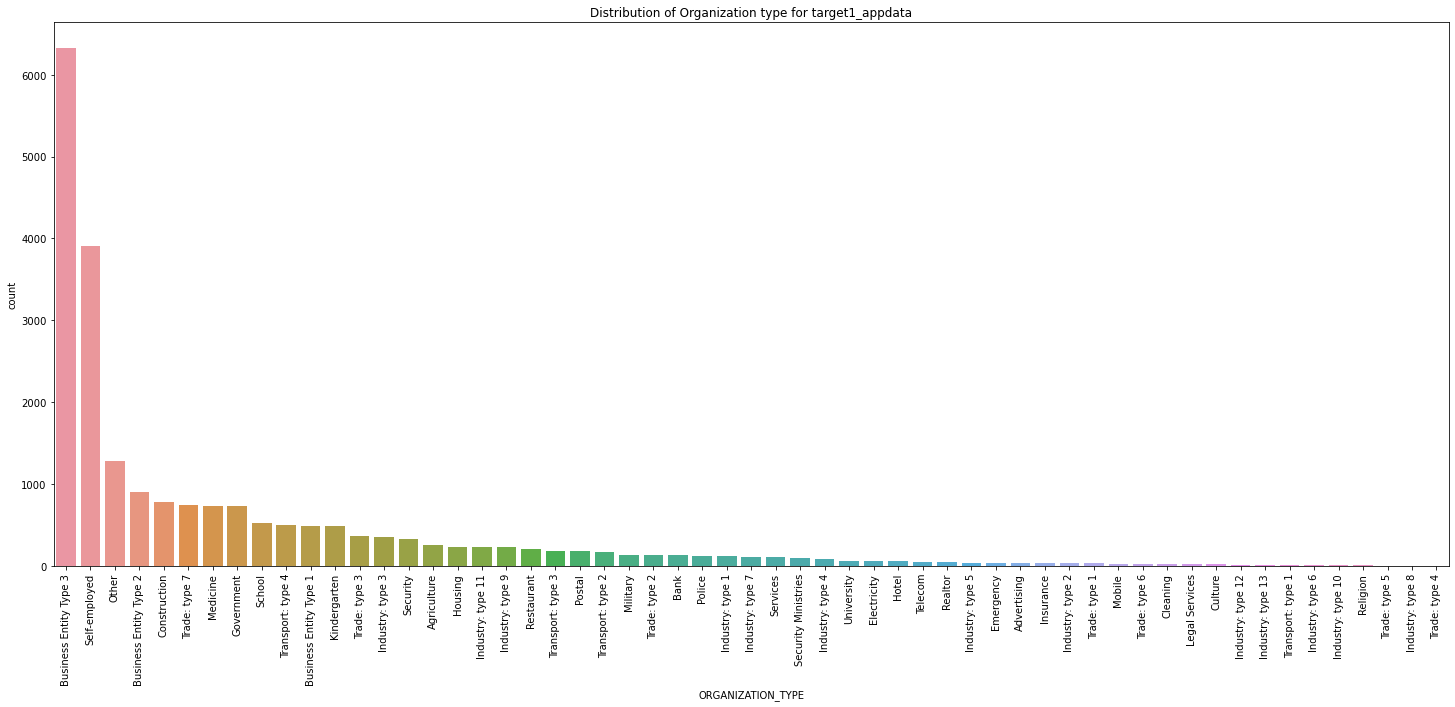

In [66]:
plot_one_var(target1_appdata,col='ORGANIZATION_TYPE',title='Distribution of Organization type for target1_appdata')

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.
3. Same as type 0 in distribution of organization type.

In [67]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   252137 non-null  int64   
 1   TARGET                       252137 non-null  int64   
 2   NAME_CONTRACT_TYPE           252137 non-null  object  
 3   CODE_GENDER                  252137 non-null  object  
 4   FLAG_OWN_CAR                 252137 non-null  object  
 5   FLAG_OWN_REALTY              252137 non-null  object  
 6   CNT_CHILDREN                 252137 non-null  int64   
 7   AMT_INCOME_TOTAL             252137 non-null  float64 
 8   AMT_CREDIT                   252137 non-null  float64 
 9   AMT_ANNUITY                  252137 non-null  float64 
 10  AMT_GOODS_PRICE              252137 non-null  float64 
 11  NAME_TYPE_SUITE              252137 non-null  object  
 12  NAME_INCOME_TYPE             252137 non-null

In [68]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_appdata.iloc[:,[6,7,8,9,10,16,17,18,19]]
target1_corr=target1_appdata.iloc[:,[6,7,8,9,10,16,17,18,19]]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [69]:
# Correlation for target 0
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.027084,-0.030579,0.266534,0.030948,0.155518
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.408319,0.110074,-0.054666,-0.060868,0.040559
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.984499,0.060706,-0.169030,-0.104251,-0.015318
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.823739,0.064328,-0.100287,-0.074643,0.010712
AMT_GOODS_PRICE,-0.027084,0.408319,0.984499,0.823739,1.000000,0.069873,-0.169015,-0.109297,-0.014990
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,0.069873,1.000000,-0.041663,0.000900,-0.042400
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.169015,-0.041663,1.000000,0.307787,0.265449
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,-0.109297,0.000900,0.307787,1.000000,0.126708
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.014990,-0.042400,0.265449,0.126708,1.000000


In [70]:
# Correlation for target 1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.005792,-0.029682,0.175025,0.006823,0.110854
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.369080,0.058005,-0.103026,-0.053798,0.011378
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.975458,0.043545,-0.200718,-0.107605,-0.021973
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.805644,0.028666,-0.100200,-0.060193,0.019762
AMT_GOODS_PRICE,-0.005792,0.369080,0.975458,0.805644,1.000000,0.058364,-0.198796,-0.116043,-0.023023
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,0.058364,1.000000,-0.044444,-0.015246,-0.033490
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.198796,-0.044444,1.000000,0.256870,0.192350
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.116043,-0.015246,0.256870,1.000000,0.086286
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.023023,-0.033490,0.192350,0.086286,1.000000


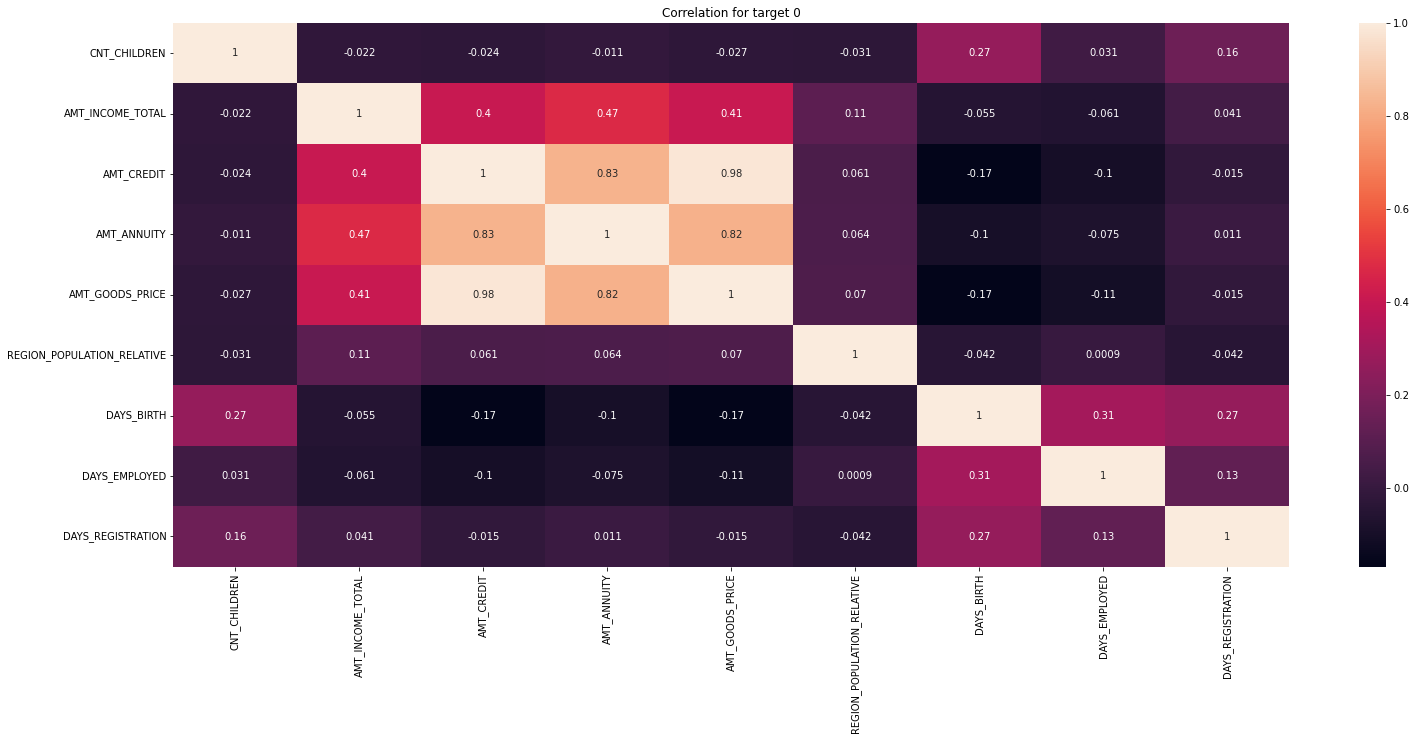

In [71]:
# For Target 0
corr_heatmap(data=target0,title='Correlation for target 0')

As we can see from above correlation heatmap, There are number of observation we can point out

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

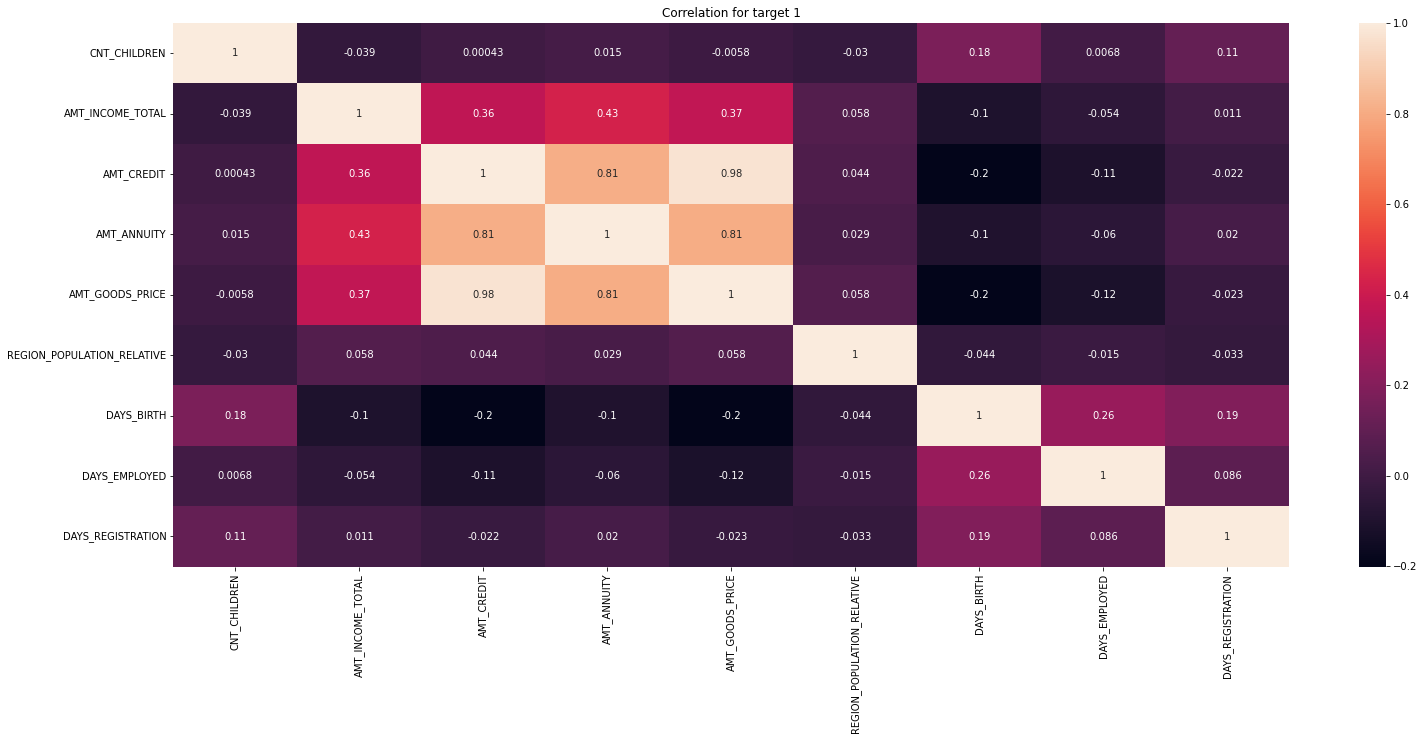

In [72]:
# For Target 1
corr_heatmap(data=target1,title='Correlation for target 1')

This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

**Univariate analysis for variables**

**For Target 0 - Finding any outliers** 

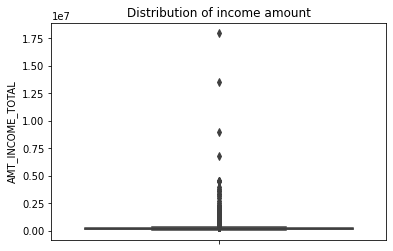

In [73]:
# Distribution of income amount

univariate_analysis(data=target0_appdata,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.


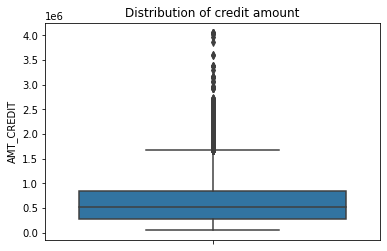

In [74]:
# Disrtibution of credit amount

univariate_analysis(data=target0_appdata,col='AMT_CREDIT',title='Distribution of credit amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.


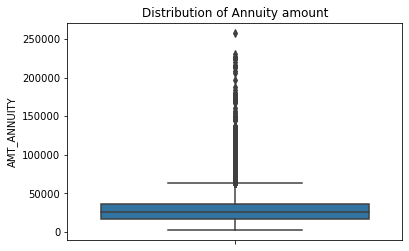

In [75]:
# Distribution of anuuity amount

univariate_analysis(data=target0_appdata,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.


**For Target 1 - Finding any outliers**

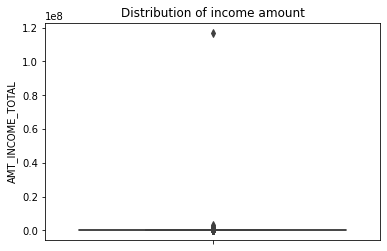

In [76]:
# Distribution of income amount

univariate_analysis(data=target1_appdata,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.
3. Most of the clients of income are present in first quartile.


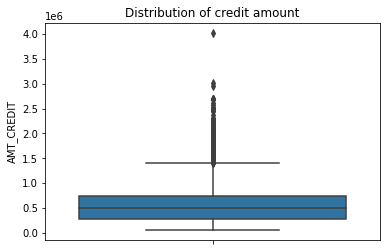

In [77]:
# Distribution of credit amount

univariate_analysis(data=target1_appdata,col='AMT_CREDIT',title='Distribution of credit amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

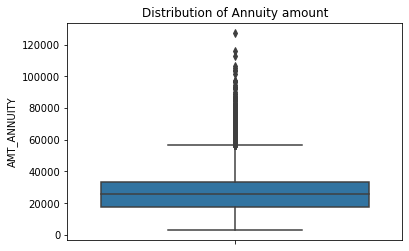

In [78]:
# Distribution of Annuity amount

univariate_analysis(data=target1_appdata,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

**Bivariate analysis for numerical variables**

**For Target 0**

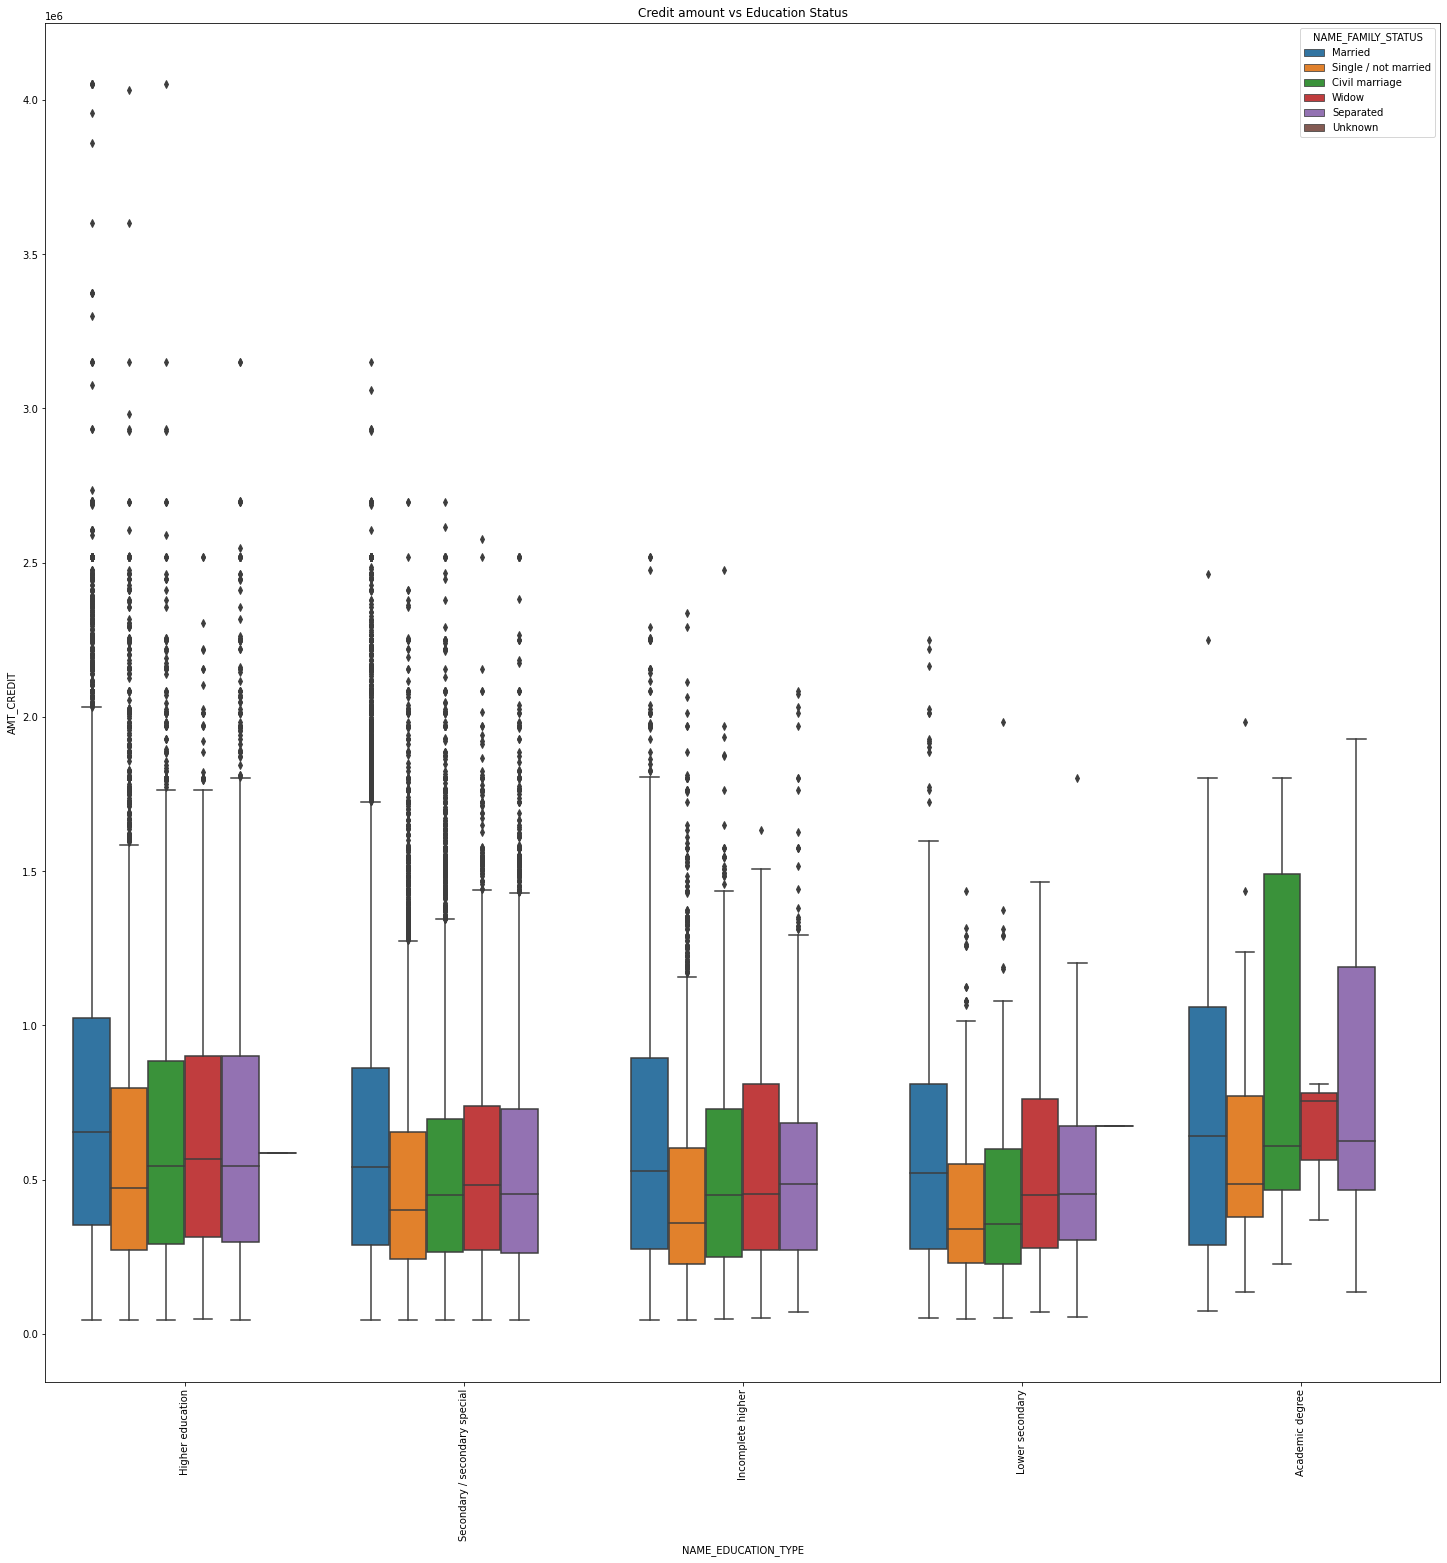

In [79]:
# Box plotting for Credit amount

plt.figure(figsize=(25,25))
plt.xticks(rotation=90)
sns.boxplot(data =target0_appdata, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.

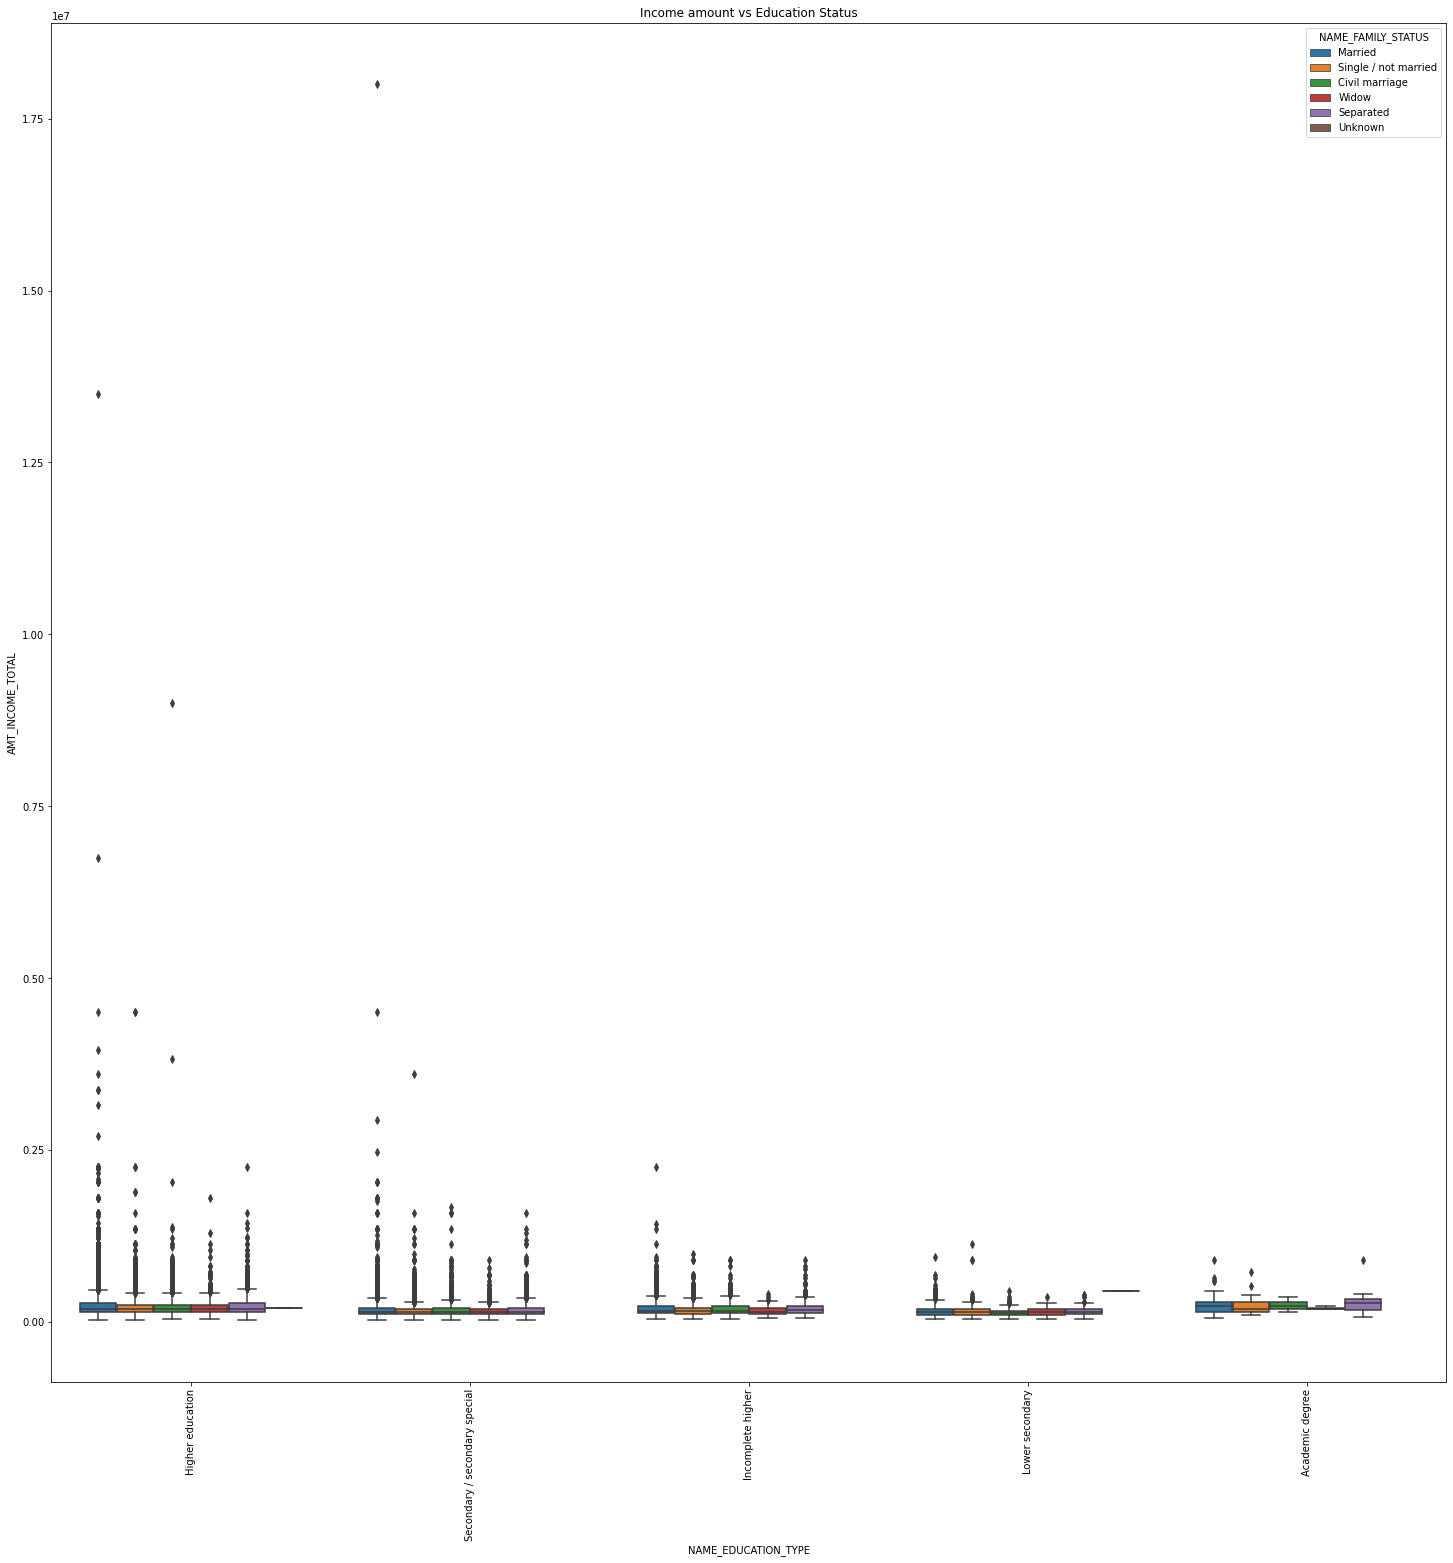

In [80]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(25,25))
plt.xticks(rotation=90)
sns.boxplot(data =target0_appdata, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.

**For Target 1**

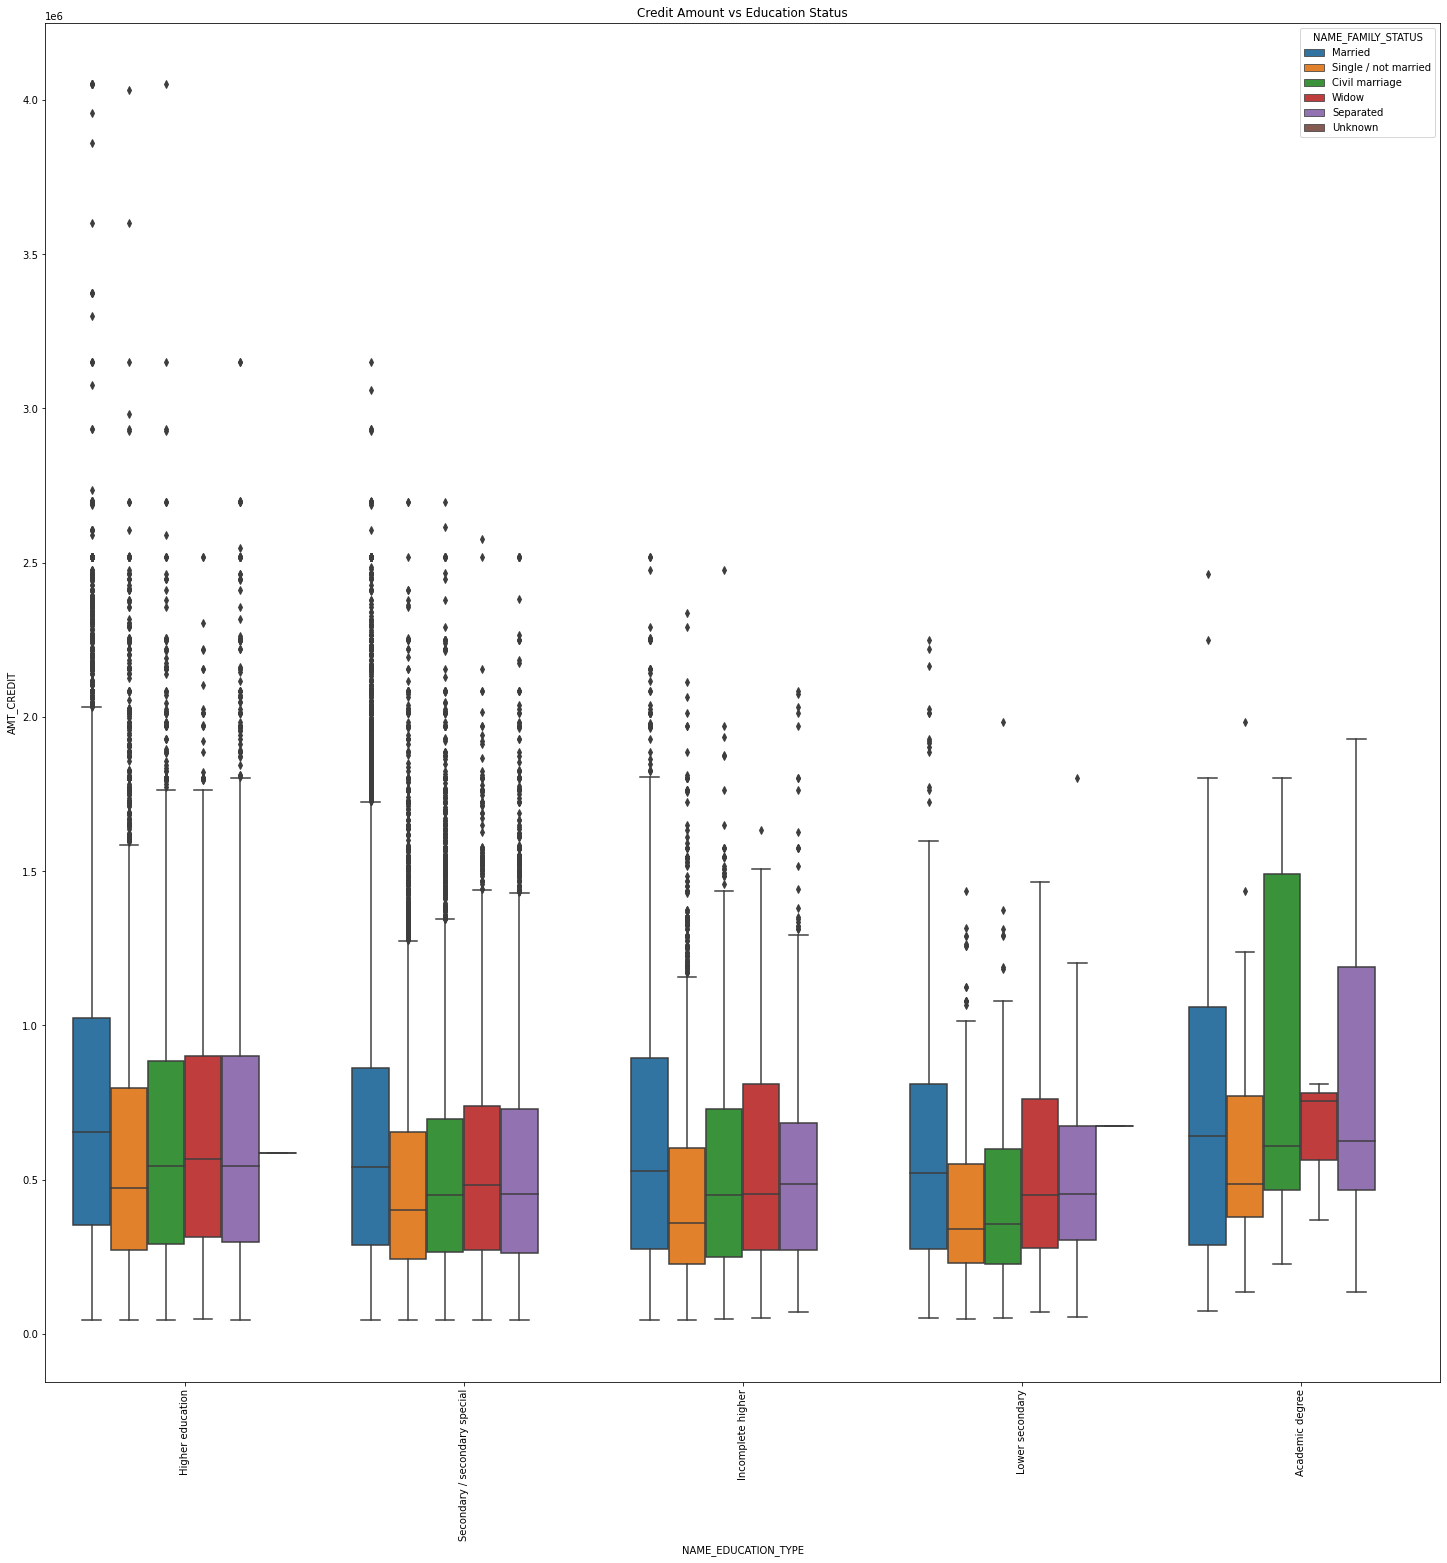

In [81]:
# Box plotting for credit amount

plt.figure(figsize=(25,25))
plt.xticks(rotation=90)
sns.boxplot(data =target0_appdata, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Quite similar with Target 0
From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.

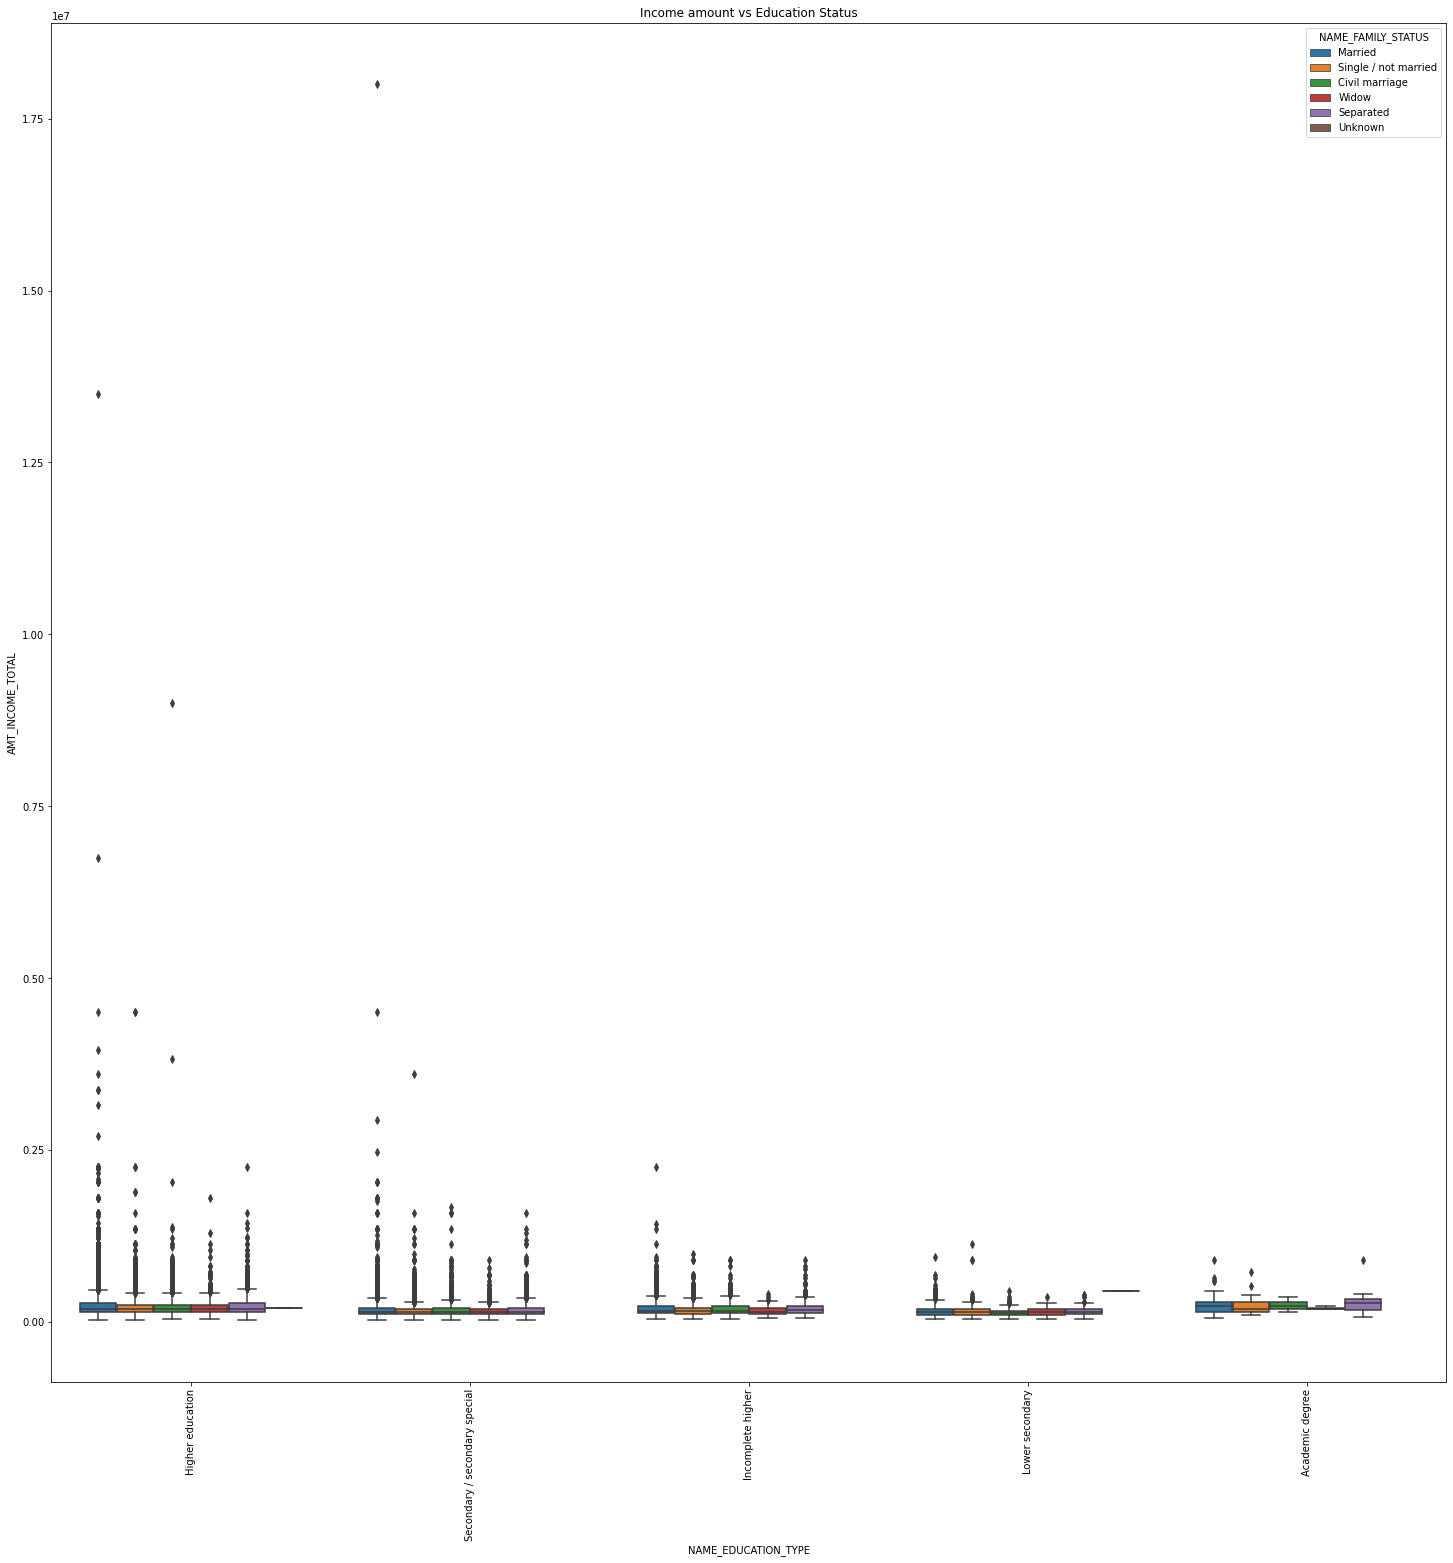

In [82]:
# Box plotting for Income amount

plt.figure(figsize=(25,25))
plt.xticks(rotation=90)
sns.boxplot(data =target0_appdata, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0,
From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.

**NOTE - Please change the reading directory of the dataset in the below query as per your requirments**

In [83]:
# Reading the dataset of previous application

prevdata=pd.read_csv("previous_application.csv")

In [84]:
# seeing row and columnss
prevdata.shape

(1670214, 37)

In [85]:
prevdata.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [86]:
# seeing percentage of null values
(prevdata.isnull().sum()/len(prevdata)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [87]:
#taking thresold at 35% of columns

columns_greater_than_35per = (prevdata.isnull().sum()/len(prevdata)*100).sort_values(ascending=False)
columns_greater_than_35per = columns_greater_than_35per[columns_greater_than_35per.values>35]
columns_greater_than_35per

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
dtype: float64

In [88]:
columns_greater_than_35per.shape

(11,)

In [89]:
len(columns_greater_than_35per)

11

In [90]:
#taking index of 11 columns whose 35%
columns_index_35per = columns_greater_than_35per.index
columns_index_35per

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object')

In [91]:
#droping 35% columns
prevdata.drop(labels = columns_index_35per,axis=1,inplace=True)

In [92]:
prevdata.shape

(1670214, 26)

In [93]:
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [94]:
prevdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [95]:
(prevdata.isnull().sum()/len(prevdata)*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [96]:
prevdata.AMT_GOODS_PRICE.value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [97]:
prevdata.AMT_GOODS_PRICE.fillna(prevdata.AMT_GOODS_PRICE.median(),inplace=True)

In [98]:
(prevdata.isnull().sum()/len(prevdata)*100).sort_values(ascending=False)

AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_PAYMENT_TYPE               0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_GOODS_PRICE                 0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [99]:
prevdata.AMT_ANNUITY.value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [100]:
prevdata.AMT_ANNUITY.fillna(prevdata.AMT_ANNUITY.median(),inplace=True)

In [101]:
(prevdata.isnull().sum()/len(prevdata)*100).sort_values(ascending=False)

CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_PAYMENT_TYPE               0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_GOODS_PRICE                 0.000000
AMT_APPLICATION                 0.000000
AMT_ANNUITY                     0.000000
NAME_CONTRACT_TY

In [102]:
prevdata.CNT_PAYMENT.fillna(prevdata.CNT_PAYMENT.median(),inplace=True)

In [103]:
prevdata.isnull().sum().sort_values(ascending=False)

PRODUCT_COMBINATION            346
AMT_CREDIT                       1
NAME_PAYMENT_TYPE                0
NAME_YIELD_GROUP                 0
CNT_PAYMENT                      0
NAME_SELLER_INDUSTRY             0
SELLERPLACE_AREA                 0
CHANNEL_TYPE                     0
NAME_PRODUCT_TYPE                0
NAME_PORTFOLIO                   0
NAME_GOODS_CATEGORY              0
NAME_CLIENT_TYPE                 0
CODE_REJECT_REASON               0
SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_STATUS             0
NAME_CASH_LOAN_PURPOSE           0
NFLAG_LAST_APPL_IN_DAY           0
FLAG_LAST_APPL_PER_CONTRACT      0
HOUR_APPR_PROCESS_START          0
WEEKDAY_APPR_PROCESS_START       0
AMT_GOODS_PRICE                  0
AMT_APPLICATION                  0
AMT_ANNUITY                      0
NAME_CONTRACT_TYPE               0
DAYS_DECISION                    0
dtype: int64

In [104]:
prevdata.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [105]:
prevdata['PRODUCT_COMBINATION'].fillna('Not Available',inplace=True)

In [106]:
prevdata.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                     1
SK_ID_PREV                     0
NAME_PAYMENT_TYPE              0
NAME_YIELD_GROUP               0
CNT_PAYMENT                    0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
DAYS_DECISION                  0
SK_ID_CURR                     0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_GOODS_PRICE                0
AMT_APPLICATION                0
AMT_ANNUITY                    0
NAME_CONTRACT_TYPE             0
PRODUCT_COMBINATION            0
dtype: int64

In [107]:
prevdata.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [108]:
prevdata.AMT_CREDIT.fillna(prevdata.AMT_CREDIT.median(),inplace=True)

In [109]:
prevdata.isnull().sum().sort_values(ascending=False)

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_YIELD_GROUP               0
CNT_PAYMENT                    0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
NAME_PAYMENT_TYPE              0
DAYS_DECISION                  0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_GOODS_PRICE                0
AMT_CREDIT                     0
AMT_APPLICATION                0
AMT_ANNUITY                    0
NAME_CONTRACT_TYPE             0
PRODUCT_COMBINATION            0
dtype: int64

In [110]:
prevdata['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [111]:
#find XAP containg column and also count in shape

for i in prevdata.columns:
    if (prevdata[prevdata[i]=='XAP'].shape)[0] != 0:
        print(i,' = ',prevdata[prevdata[i]=='XAP'].shape,'Percentage = ',(prevdata[prevdata[i]=='XAP'].shape)[0]/len(prevdata)*100)

NAME_CASH_LOAN_PURPOSE  =  (922661, 26) Percentage =  55.242082751072616
CODE_REJECT_REASON  =  (1353093, 26) Percentage =  81.01315160811728


In [112]:
# Hence, dropping the rows of total 922661 have 'XAP' values in the cash loan purpose column

prevdata = prevdata.drop(prevdata.loc[prevdata['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
prevdata[prevdata['NAME_CASH_LOAN_PURPOSE']=='XAP'].shape

(0, 26)

In [113]:
# Hence, dropping the rows of total 677918 have 'XNA' values in the cash loan purpose column

prevdata = prevdata.drop(prevdata.loc[prevdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prevdata[prevdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].shape

(0, 26)

In [114]:
#find XNA containg column and also count in shape

for i in prevdata.columns:
    if (prevdata[prevdata[i]=='XNA'].shape)[0] != 0:
        print(i,' = ',prevdata[prevdata[i]=='XNA'].shape,'Percentage = ',(prevdata[prevdata[i]=='XNA'].shape)[0]/len(prevdata)*100)

NAME_PAYMENT_TYPE  =  (5416, 26) Percentage =  7.777697996697064
CODE_REJECT_REASON  =  (527, 26) Percentage =  0.7568033316579306
NAME_CLIENT_TYPE  =  (53, 26) Percentage =  0.07611115100165147
NAME_GOODS_CATEGORY  =  (69635, 26) Percentage =  100.0
NAME_PORTFOLIO  =  (263, 26) Percentage =  0.37768363610253464
NAME_PRODUCT_TYPE  =  (263, 26) Percentage =  0.37768363610253464
NAME_SELLER_INDUSTRY  =  (63993, 26) Percentage =  91.89775256695627
NAME_YIELD_GROUP  =  (263, 26) Percentage =  0.37768363610253464


In [115]:
prevdata.shape

(69635, 26)

In [116]:
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69635 entries, 4 to 1670206
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   69635 non-null  int64  
 1   SK_ID_CURR                   69635 non-null  int64  
 2   NAME_CONTRACT_TYPE           69635 non-null  object 
 3   AMT_ANNUITY                  69635 non-null  float64
 4   AMT_APPLICATION              69635 non-null  float64
 5   AMT_CREDIT                   69635 non-null  float64
 6   AMT_GOODS_PRICE              69635 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   69635 non-null  object 
 8   HOUR_APPR_PROCESS_START      69635 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  69635 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       69635 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       69635 non-null  object 
 12  NAME_CONTRACT_STATUS         69635 non-null  object 
 13  DAYS_DECISION 

In [117]:
prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,45000.0,SATURDAY,16,Y,...,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0,high,Cash Street: high
51,2664403,163660,Cash loans,9804.285,67500.0,82611.0,67500.0,SATURDAY,10,Y,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
85,1981960,306707,Cash loans,10678.005,225000.0,269550.0,225000.0,WEDNESDAY,11,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,low_normal,Cash Street: low


In [118]:
prevdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,6.963500e+04,69635.000000,69635.000000,6.963500e+04,6.963500e+04,6.963500e+04,69635.000000,69635.000000,69635.000000,69635.000000,69635.000000
mean,1.935842e+06,278555.901084,25628.269781,4.533566e+05,5.096662e+05,4.533566e+05,12.180125,0.999081,-648.234164,9.132419,29.574223
std,5.300383e+05,103065.139046,17416.091036,4.917079e+05,5.371849e+05,4.917079e+05,3.217940,0.030303,534.865018,128.160557,17.666563
min,1.000125e+06,100034.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2465.000000,-1.000000,5.000000
25%,1.481020e+06,189482.000000,13471.942500,1.350000e+05,1.528200e+05,1.350000e+05,10.000000,1.000000,-707.000000,-1.000000,12.000000
50%,1.942746e+06,279260.000000,21332.205000,2.700000e+05,3.065310e+05,2.700000e+05,12.000000,1.000000,-506.000000,-1.000000,24.000000
75%,2.393264e+06,368506.000000,32654.317500,6.075000e+05,6.750000e+05,6.075000e+05,15.000000,1.000000,-313.000000,0.000000,48.000000
max,2.845265e+06,456255.000000,418058.145000,4.050000e+06,4.104351e+06,4.050000e+06,23.000000,1.000000,-2.000000,12102.000000,60.000000


In [119]:
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69635 entries, 4 to 1670206
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   69635 non-null  int64  
 1   SK_ID_CURR                   69635 non-null  int64  
 2   NAME_CONTRACT_TYPE           69635 non-null  object 
 3   AMT_ANNUITY                  69635 non-null  float64
 4   AMT_APPLICATION              69635 non-null  float64
 5   AMT_CREDIT                   69635 non-null  float64
 6   AMT_GOODS_PRICE              69635 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   69635 non-null  object 
 8   HOUR_APPR_PROCESS_START      69635 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  69635 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       69635 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       69635 non-null  object 
 12  NAME_CONTRACT_STATUS         69635 non-null  object 
 13  DAYS_DECISION 

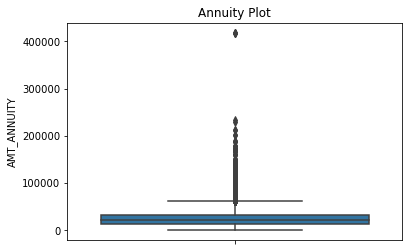

In [120]:
univariate_analysis(prevdata,col='AMT_ANNUITY',title="Annuity Plot")

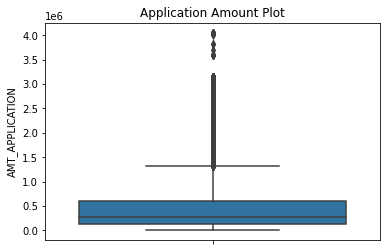

In [121]:
univariate_analysis(prevdata,col='AMT_APPLICATION',title="Application Amount Plot")

In [122]:
# Finding some correlation for numerical columns

prevdata_corr=prevdata.iloc[:,[3,4,5,6,13,23]]

prevdata_corr=prevdata_corr.corr(method='spearman')

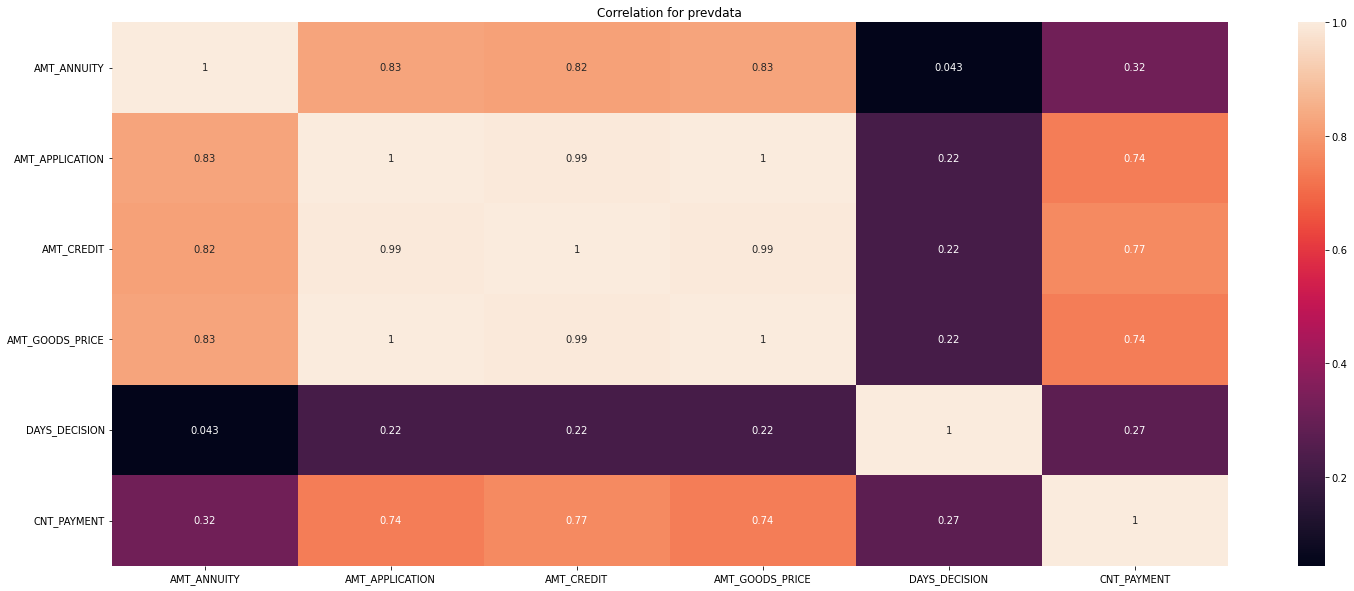

In [123]:
# For prevdata correlaction

corr_heatmap(data=prevdata_corr,title='Correlation for prevdata')

In [124]:
# Now merging the Application dataset with previous appliaction dataset

newappdata=pd.merge(left=appdata,right=prevdata,how='inner',on='SK_ID_CURR',suffixes='_x')

C:\Users\admi\AppData\Local\Temp/ipykernel_11060/2546186884.py:3: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  newappdata=pd.merge(left=appdata,right=prevdata,how='inner',on='SK_ID_CURR',suffixes='_x')


In [125]:
# Renaming the column names after merging

newappdata = newappdata.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



**Performing univariate analysis**

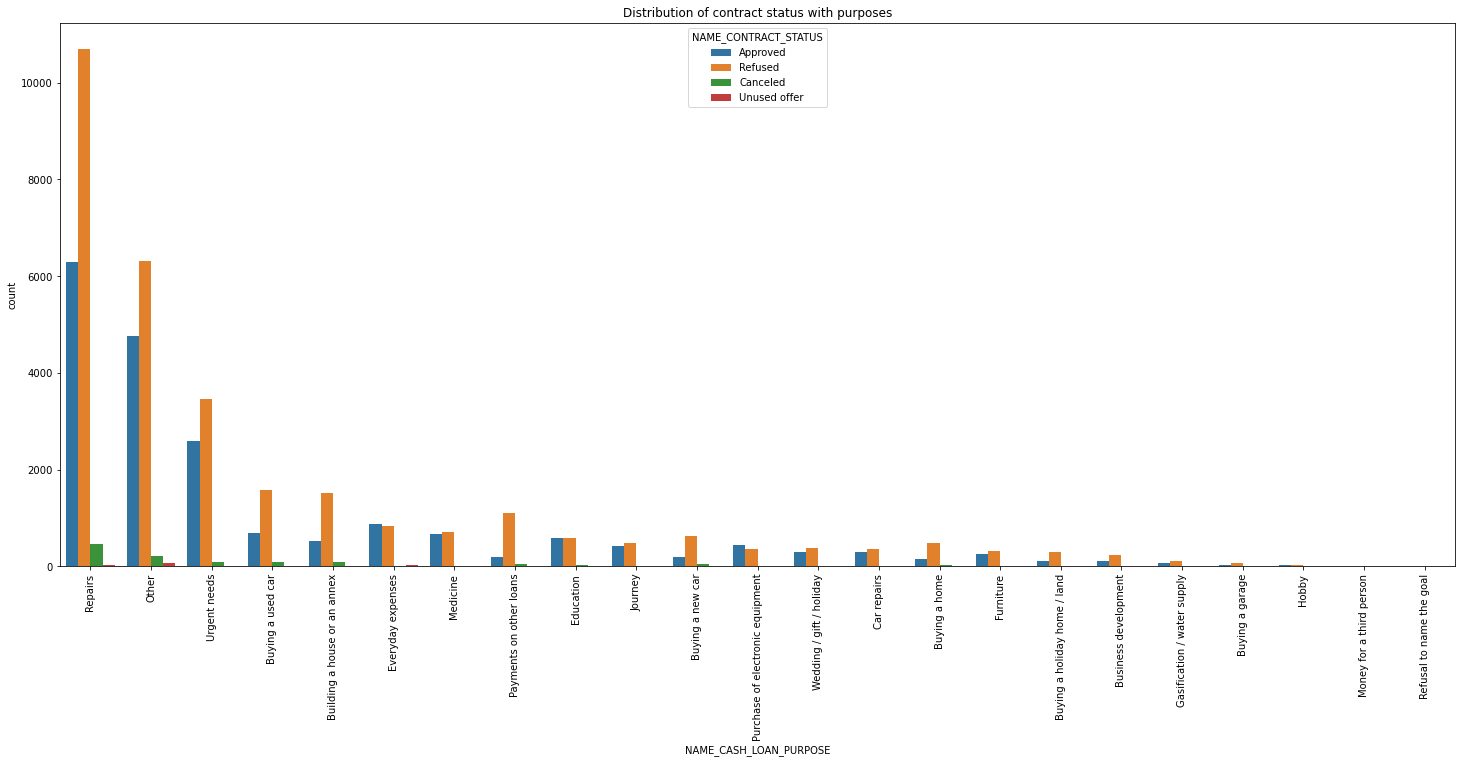

In [126]:
plot_one_var(newappdata,col='NAME_CASH_LOAN_PURPOSE',title='Distribution of contract status with purposes',hue = 'NAME_CONTRACT_STATUS')

Points to be concluded from above plot:

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Payign other loans and buying a new car is having significant higher rejection than approves.

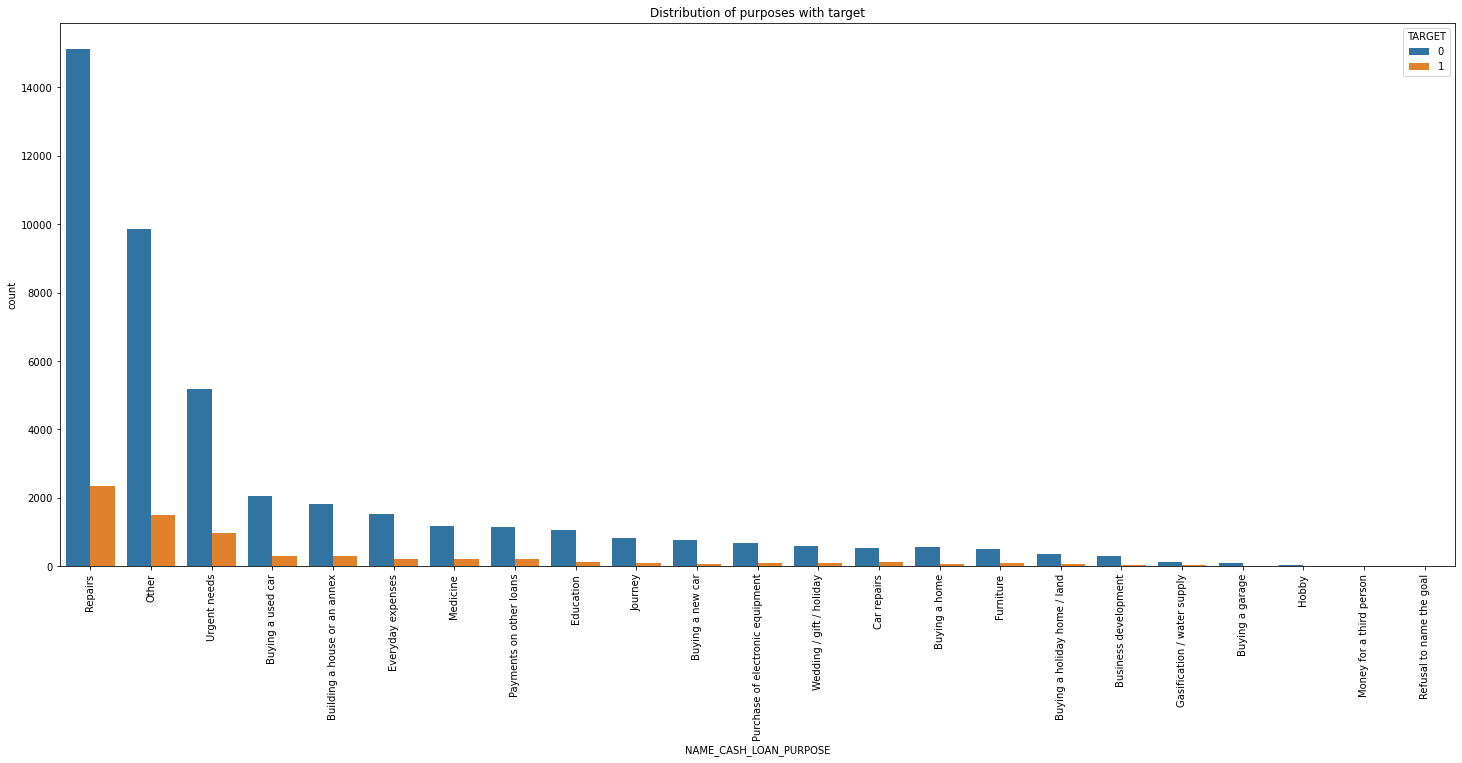

In [127]:
plot_one_var(newappdata,col='NAME_CASH_LOAN_PURPOSE',title='Distribution of purposes with target',hue='TARGET')

Few points we can conclude from abpve plot:

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.
    They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'
Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

**Performing bivariate analysis**

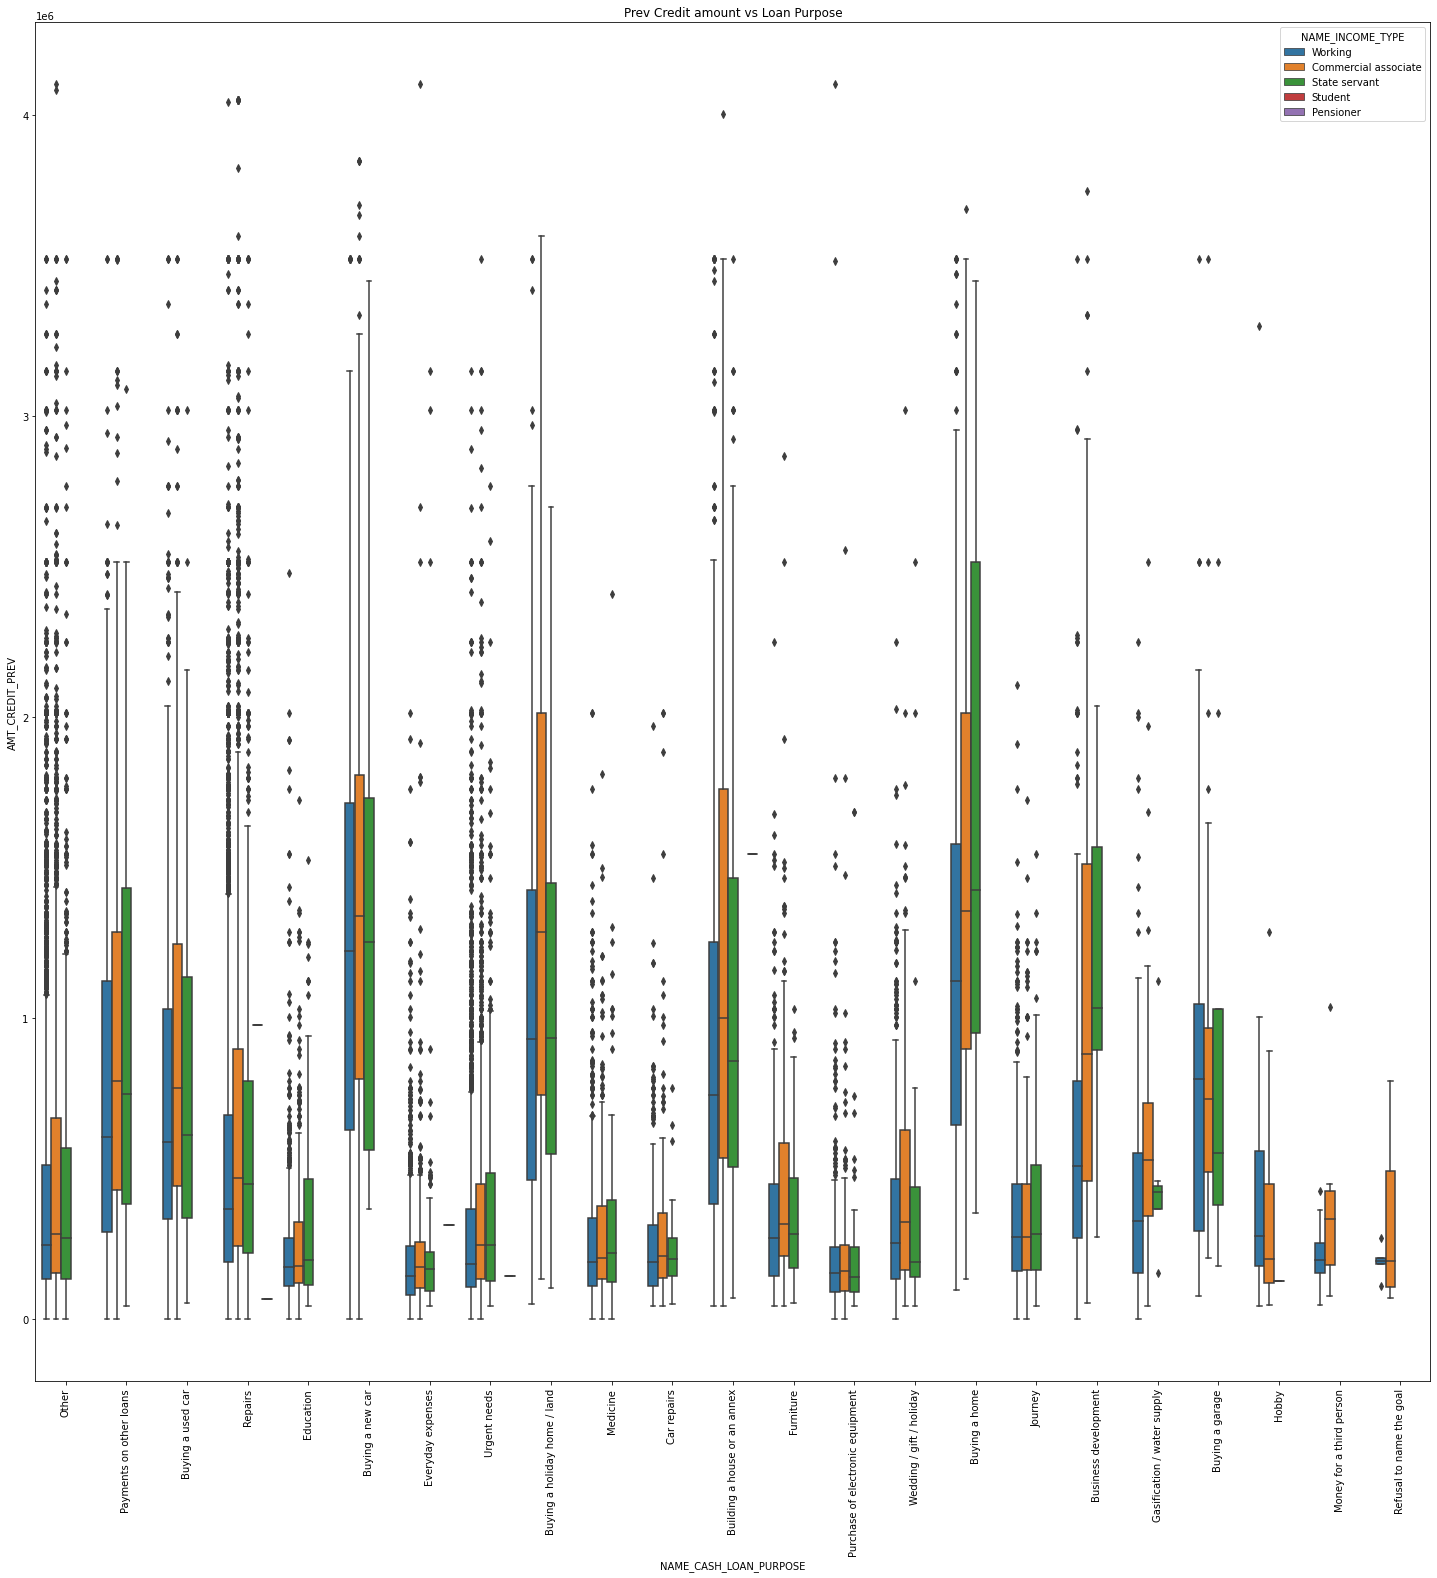

In [128]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(25,25))
plt.xticks(rotation=90)
sns.boxplot(data =newappdata, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points-

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

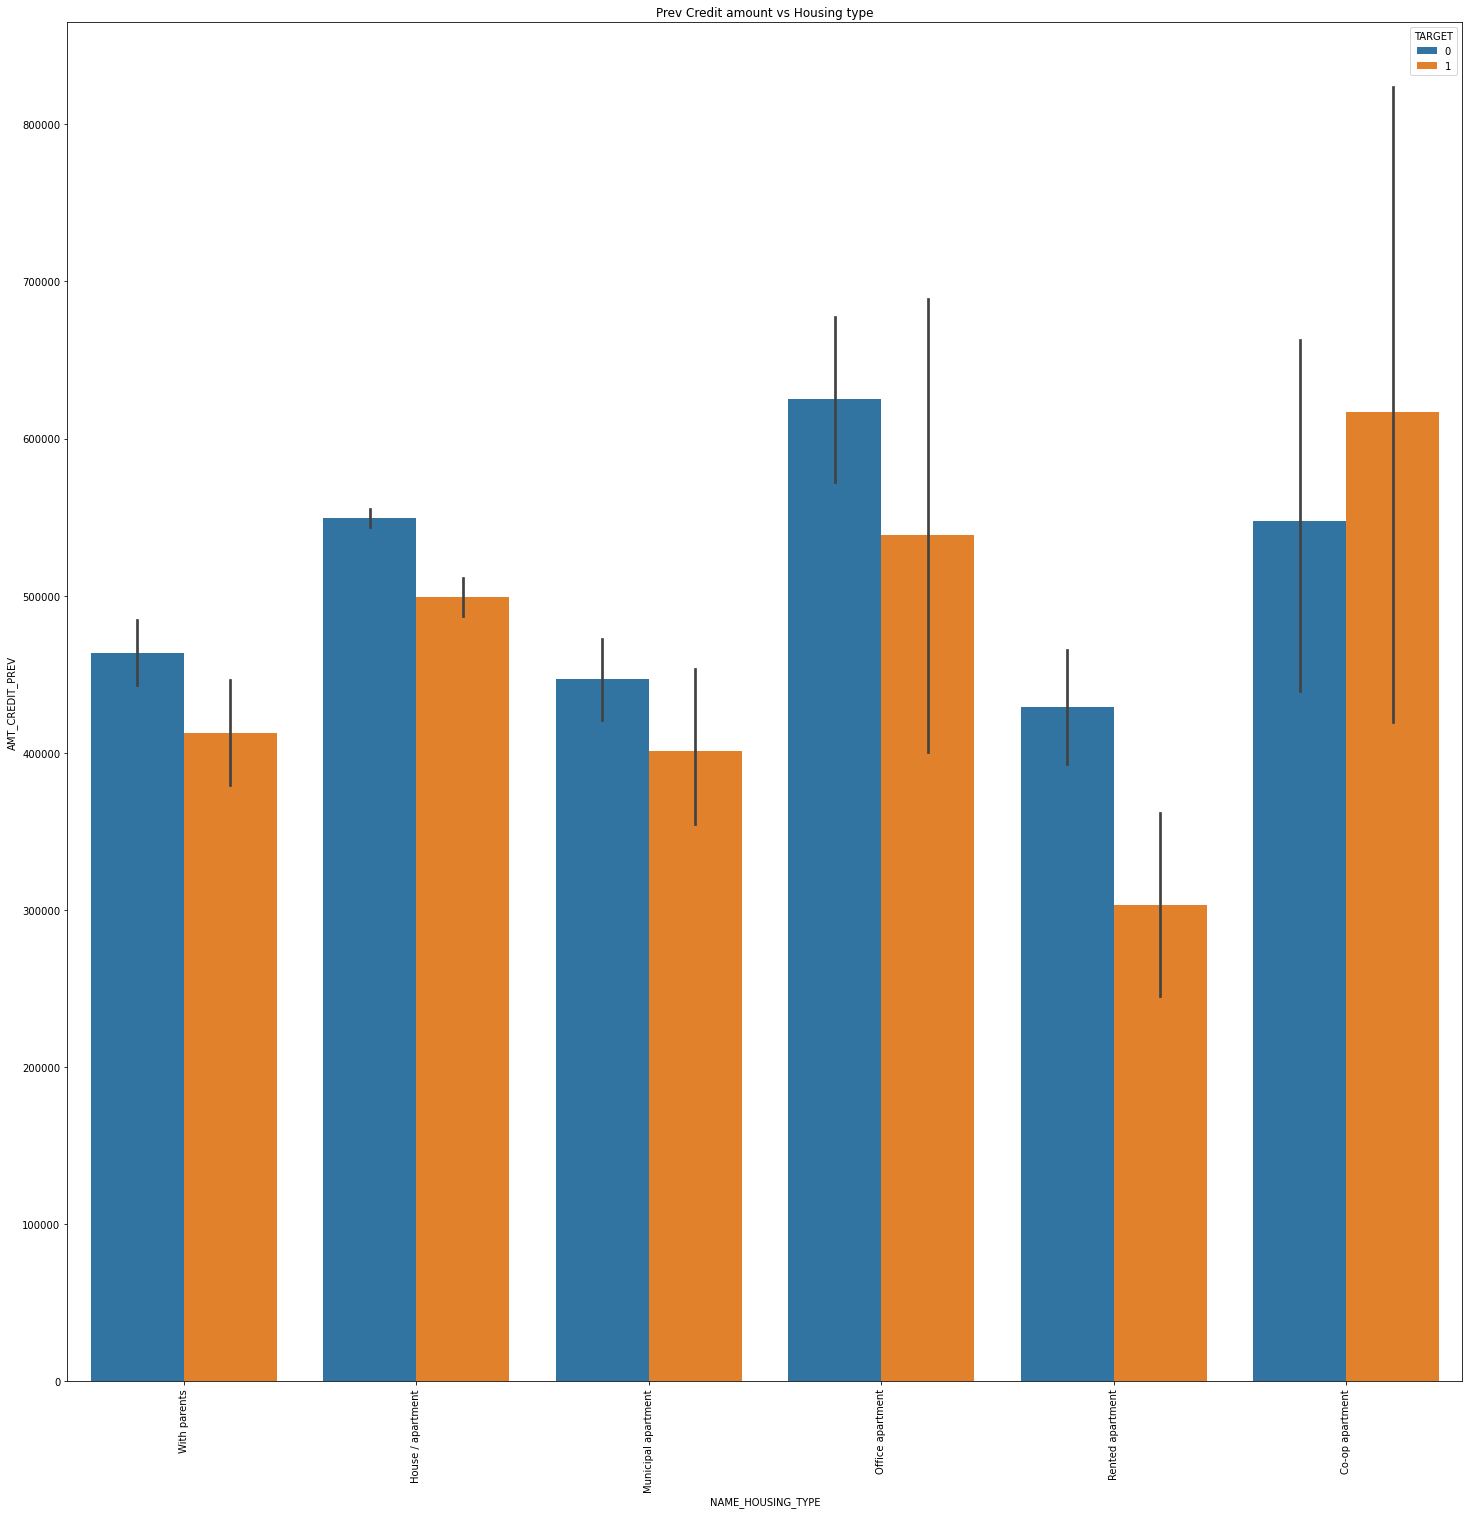

In [129]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(25,25))
plt.xticks(rotation=90)
sns.barplot(data =newappdata, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# CONCLUSION

**1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other
     than ‘Co-op apartment’ for successful payments.**

**2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.**

**3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.**

**4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.**
